# Problem 01

```
1900년 남자아이, 여자아이의 전체 수 출력
```

In [3]:
import pandas as pd
import numpy as np

pieces = []
for year in range(1880,2011):
    path = r"C:\Users\Administrator\names\names\yob%d.txt" % year
    df = pd.read_csv(path, names = ['name','sex','birth'])
    df['year'] = year
    pieces.append(df)
    
# pd.concat(pieces).loc[0]  
## concat 했을 떄 여러개의 인덱스가 발생되는 문제가 있기 떄문에

names = pd.concat(pieces, ignore_index=True) # ignore index 해줘야한다.
names

name sex  birth  year
0             Mary   F   7065  1880
1             Anna   F   2604  1880
2             Emma   F   2003  1880
3        Elizabeth   F   1939  1880
4           Minnie   F   1746  1880
...            ...  ..    ...   ...
1690779    Zymaire   M      5  2010
1690780     Zyonne   M      5  2010
1690781  Zyquarius   M      5  2010
1690782      Zyran   M      5  2010
1690783      Zzyzx   M      5  2010

[1690784 rows x 4 columns]

In [13]:
year_sex = names.pivot_table('birth',index='year',
                  columns='sex',aggfunc=sum)
year_sex.loc[1900] # 1900년 남자아이와 여자아이의 전체 수

sex
F    299873
M    150554
Name: 1900, dtype: int64

# Problem 02

```
남자/여자 이름이 바뀐 경우(대소문자 구분 안함)
lesley : 여자 -> 남자 (시각화)
확인 이름 : Leslie, Lesley, Leslee, Lesli, Lesly
```

In [18]:
import matplotlib.pyplot as plt

In [33]:
# 이름 소문자화
names.name = names.name.map(lambda x: x.lower())
# 확인할 이름들
check_name = "Leslie, Lesley, Leslee, Lesli, Lesly".lower().split(', ')
check_name

['leslie', 'lesley', 'leslee', 'lesli', 'lesly']

In [50]:
df = names.pivot_table('birth',index=['year','sex'],columns=['name'], aggfunc=sum)
df.head()

name      aaban  aabid  aabriella  aadam  aadan  aadarsh  aaden  aadesh  \
year sex                                                                  
1880 F      NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN   
     M      NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN   
1881 F      NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN   
     M      NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN   
1882 F      NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN   

name      aadhav  aadhavan  ...  zyrus  zysean  zyshaun  zyshawn  zyshon  \
year sex                    ...                                            
1880 F       NaN       NaN  ...    NaN     NaN      NaN      NaN     NaN   
     M       NaN       NaN  ...    NaN     NaN      NaN      NaN     NaN   
1881 F       NaN       NaN  ...    NaN     NaN      NaN      NaN     NaN   
     M       NaN       NaN  ...    NaN     NaN      NaN      NaN     NaN   
1882 F       NaN       NaN  ...    NaN     NaN      NaN      NaN     NaN   

name      zyshonne  zytavious  zyvion  zyyanna  zzyzx  
year sex                                               
1880 F         NaN        NaN     NaN      NaN    NaN  
     M         NaN        NaN     NaN      NaN    NaN  
1881 F         NaN        NaN     NaN      NaN    NaN  
     M         NaN        NaN     NaN      NaN    NaN  
1882 F         NaN        NaN     NaN      NaN    NaN  

[5 rows x 88496 columns]

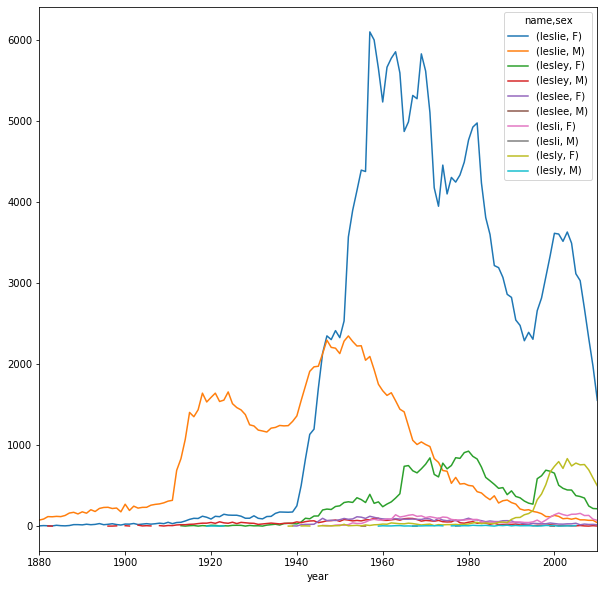

In [63]:
# subset.plot(subplots=True, figsize=(12,10), yticks=[20000,20000,30000,90000])
df[check_name].unstack('sex').plot(figsize=(10,10))

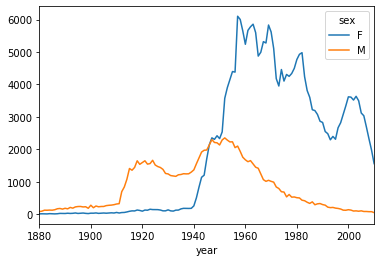

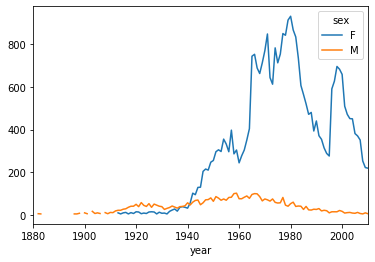

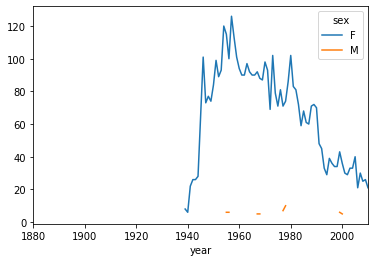

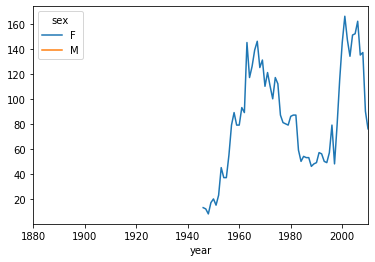

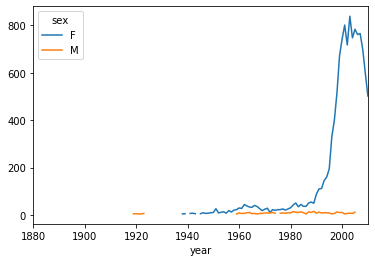

In [64]:
# 각 이름별 남여의 이름 그래프 변동 확인
for x in check_name:
    df[x].unstack('sex').plot()

# Problem 03

```
3. data.go.kr(해도/안해도)
검색어 : 이름 -> 동대문구 동물이름 download
동물이름 첫번째 글자로 가장 많이 오는 글자는 무엇인가?
```

In [72]:
path = r"서울특별시_동대문구_등록동물이름현황_20191203.csv"
animal_names = pd.read_csv(path, encoding='ANSI')
animal_names.head(3)

등록이름  등록건수     데이터기준일자
0   코코   238  2019-12-03
1   보리   190  2019-12-03
2   초코   175  2019-12-03

In [74]:
animal_names['이름첫글자'] = animal_names['등록이름'].map(lambda x : x[0])
animal_names.head(3)

등록이름  등록건수     데이터기준일자 이름첫글자
0   코코   238  2019-12-03     코
1   보리   190  2019-12-03     보
2   초코   175  2019-12-03     초

In [85]:
first_name_counts = animal_names.groupby('이름첫글자')['등록건수'].sum()
first_name_counts.sort_values(ascending=False)[:10]

이름첫글자
아    371
초    347
코    298
하    283
콩    269
몽    266
보    263
미    230
뽀    221
사    215
Name: 등록건수, dtype: int64

# Problem 04

```
문제
렌덤으로 1부터 45 까지의 무작위로섞인 6개의숫자와1개의보너스숫자를 당첨번호를생성해저장한뒤

로또를 몇개살지 입력받고 입력된번호의수 에따라 렌덤으로뽑힌 번호를 당첨번호와비교!

한뒤 당첨이되면 당첨된 번호와 축하의말을 출력 해주자

예시 : 로또를 몇개 구매하시겠습니까? : 5

 현재 당첨번호는 43,2,35,16,4,6 보너스번호는 11 입니다.

 구매하신 추첨번호는 43,2,41,18,19,21 보너스번호는 8입니다.

 구매하신 추첨번호는 28,20,1,4,32,5 보너스번호는 8입니다

 구매하신 추첨번호.... 11,4,35,2,43,16 보너스번호 6 ..1등이다!! 아싸 오늘저녁은 치킨이닭!!


            7가지의 숫자가다 맞으면 1등

            6가지의 숫자가 맞으면 2등

            5가지 숫자가 맞으면 3등

```

In [146]:
import random

lotto = list(range(1,46,1))
lucky_number = random.sample(lotto,7)
lotto_num = lucky_number[:6]
bonus = lucky_number[-1]
reward = [1928079219,66485491,1402240,50000,5000]
my_money = 0
reward_cnt = 0
num = int(input("로또를 몇개 구매하시겠습니까? : "))
print("현재 당첨번호는 {} 보너스번호는 {} 입니다.".format(",".join(map(str,lucky_number[:6])), bonus))
for _ in range(num):
    cnt = 0
    cnt_b = 0
    my_number = random.sample(lotto,6)
    print('구매하신 추첨번호는 {} 입니다.'.format(",".join(map(str,my_number))))
    for i in my_number:
        if i in lotto_num:
            cnt += 1
        if i is bonus:
            cnt_b += 1
    if cnt == 6 :
        print('1등입니다.')
        my_money += reward[0]
        reward_cnt += 1
    elif cnt == 5:
        reward_cnt += 1
        if cnt_b == 1:
            print('2등입니다.')
            my_money += reward[1]
        else:
            print('3등입니다.')
            my_money += reward[2]
    elif cnt == 4:
        reward_cnt += 1
        print('4등입니다.')
        my_money += reward[3]
    elif cnt == 3:
        reward_cnt += 1
        print('5등입니다.')
        my_money += reward[4]
    
print("Your Money : ",my_money*0.6 - (num * 1000))
print("I Spent ", num*1000)
print("당첨횟수 : ", reward_cnt)



로또를 몇개 구매하시겠습니까? : 100000
현재 당첨번호는 10,6,15,28,34,22 보너스번호는 23 입니다.
구매하신 추첨번호는 5,44,38,40,1,3 입니다.
구매하신 추첨번호는 4,27,44,35,43,29 입니다.
구매하신 추첨번호는 33,4,14,34,20,26 입니다.
구매하신 추첨번호는 6,15,25,30,14,21 입니다.
구매하신 추첨번호는 37,23,12,22,29,3 입니다.
구매하신 추첨번호는 25,45,19,17,7,6 입니다.
구매하신 추첨번호는 32,38,24,13,3,29 입니다.
구매하신 추첨번호는 40,4,17,31,25,18 입니다.
구매하신 추첨번호는 24,19,23,8,3,2 입니다.
구매하신 추첨번호는 43,7,1,33,41,22 입니다.
구매하신 추첨번호는 10,21,41,13,32,33 입니다.
구매하신 추첨번호는 16,27,31,20,1,23 입니다.
구매하신 추첨번호는 30,21,12,42,27,16 입니다.
구매하신 추첨번호는 37,11,29,13,45,30 입니다.
구매하신 추첨번호는 23,15,24,30,43,39 입니다.
구매하신 추첨번호는 35,7,21,8,30,3 입니다.
구매하신 추첨번호는 19,2,31,16,45,22 입니다.
구매하신 추첨번호는 31,25,37,44,45,9 입니다.
구매하신 추첨번호는 12,3,26,11,10,31 입니다.
구매하신 추첨번호는 7,34,33,13,32,5 입니다.
구매하신 추첨번호는 25,16,43,40,19,20 입니다.
구매하신 추첨번호는 42,4,18,6,32,28 입니다.
구매하신 추첨번호는 34,17,15,36,29,12 입니다.
구매하신 추첨번호는 14,27,31,45,42,8 입니다.
구매하신 추첨번호는 2,22,19,34,6,28 입니다.
4등입니다.
구매하신 추첨번호는 34,24,28,17,18,2 입니다.
구매하신 추첨번호는 27,13,37,26,23,12 입니다.
구매하신 추첨번호는 16,41,35,24,19,2 입니다.
구매하신 추

구매하신 추첨번호는 44,18,20,4,43,31 입니다.
구매하신 추첨번호는 44,21,2,41,42,32 입니다.
구매하신 추첨번호는 7,14,36,41,19,38 입니다.
구매하신 추첨번호는 8,1,11,9,16,10 입니다.
구매하신 추첨번호는 22,10,39,26,38,35 입니다.
구매하신 추첨번호는 29,25,5,20,15,14 입니다.
구매하신 추첨번호는 10,24,12,23,1,42 입니다.
구매하신 추첨번호는 23,41,19,28,40,31 입니다.
구매하신 추첨번호는 2,39,30,22,14,27 입니다.
구매하신 추첨번호는 28,7,5,44,37,4 입니다.
구매하신 추첨번호는 44,2,15,14,31,1 입니다.
구매하신 추첨번호는 3,28,14,24,2,7 입니다.
구매하신 추첨번호는 21,12,33,43,34,30 입니다.
구매하신 추첨번호는 34,4,31,1,25,30 입니다.
구매하신 추첨번호는 19,37,38,27,43,45 입니다.
구매하신 추첨번호는 8,44,31,37,45,33 입니다.
구매하신 추첨번호는 43,12,9,36,42,37 입니다.
구매하신 추첨번호는 21,39,11,42,22,9 입니다.
구매하신 추첨번호는 5,6,38,24,45,42 입니다.
구매하신 추첨번호는 40,38,36,29,21,30 입니다.
구매하신 추첨번호는 11,21,24,35,1,10 입니다.
구매하신 추첨번호는 42,37,9,30,4,36 입니다.
구매하신 추첨번호는 25,19,6,9,15,23 입니다.
구매하신 추첨번호는 25,2,40,45,13,31 입니다.
구매하신 추첨번호는 9,34,37,32,24,39 입니다.
구매하신 추첨번호는 8,23,44,37,17,40 입니다.
구매하신 추첨번호는 31,3,26,4,45,16 입니다.
구매하신 추첨번호는 31,35,27,32,19,6 입니다.
구매하신 추첨번호는 25,32,43,21,3,23 입니다.
구매하신 추첨번호는 11,43,9,37,39,14 입니다.
구매하신 추첨번호는 15,41,

구매하신 추첨번호는 18,19,31,34,6,22 입니다.
5등입니다.
구매하신 추첨번호는 34,39,41,20,2,3 입니다.
구매하신 추첨번호는 4,5,40,30,42,1 입니다.
구매하신 추첨번호는 20,15,42,28,31,23 입니다.
구매하신 추첨번호는 42,9,33,22,30,17 입니다.
구매하신 추첨번호는 34,43,16,22,31,4 입니다.
구매하신 추첨번호는 34,26,12,30,33,17 입니다.
구매하신 추첨번호는 7,15,28,1,29,35 입니다.
구매하신 추첨번호는 12,9,3,16,1,27 입니다.
구매하신 추첨번호는 19,25,9,23,18,20 입니다.
구매하신 추첨번호는 40,38,29,41,43,12 입니다.
구매하신 추첨번호는 16,7,24,18,11,39 입니다.
구매하신 추첨번호는 11,22,24,36,34,35 입니다.
구매하신 추첨번호는 29,3,39,17,6,21 입니다.
구매하신 추첨번호는 16,44,24,4,41,34 입니다.
구매하신 추첨번호는 29,6,13,22,8,11 입니다.
구매하신 추첨번호는 36,42,28,7,33,2 입니다.
구매하신 추첨번호는 45,38,17,32,9,39 입니다.
구매하신 추첨번호는 27,15,41,1,32,5 입니다.
구매하신 추첨번호는 11,40,42,38,45,26 입니다.
구매하신 추첨번호는 2,26,44,42,3,32 입니다.
구매하신 추첨번호는 8,15,26,19,17,37 입니다.
구매하신 추첨번호는 20,32,41,37,39,10 입니다.
구매하신 추첨번호는 29,36,33,25,2,11 입니다.
구매하신 추첨번호는 35,29,14,26,15,24 입니다.
구매하신 추첨번호는 24,20,41,14,3,36 입니다.
구매하신 추첨번호는 4,43,29,25,10,40 입니다.
구매하신 추첨번호는 14,45,35,28,37,20 입니다.
구매하신 추첨번호는 37,35,31,36,44,4 입니다.
구매하신 추첨번호는 35,44,21,18,2,7 입니다.
구매하신 추첨

구매하신 추첨번호는 39,45,22,8,16,5 입니다.
구매하신 추첨번호는 16,34,27,38,13,31 입니다.
구매하신 추첨번호는 2,37,25,5,6,17 입니다.
구매하신 추첨번호는 7,15,8,23,22,40 입니다.
구매하신 추첨번호는 4,34,30,17,14,41 입니다.
구매하신 추첨번호는 16,30,20,41,13,22 입니다.
구매하신 추첨번호는 44,28,17,6,14,9 입니다.
구매하신 추첨번호는 6,38,8,5,25,23 입니다.
구매하신 추첨번호는 28,5,44,2,18,4 입니다.
구매하신 추첨번호는 33,38,18,19,5,32 입니다.
구매하신 추첨번호는 16,22,9,12,24,6 입니다.
구매하신 추첨번호는 38,15,9,25,40,6 입니다.
구매하신 추첨번호는 42,8,10,5,35,16 입니다.
구매하신 추첨번호는 44,28,32,2,1,3 입니다.
구매하신 추첨번호는 37,8,3,20,38,15 입니다.
구매하신 추첨번호는 44,11,22,19,17,42 입니다.
구매하신 추첨번호는 16,10,40,19,30,12 입니다.
구매하신 추첨번호는 39,19,23,17,30,20 입니다.
구매하신 추첨번호는 28,13,10,16,43,22 입니다.
5등입니다.
구매하신 추첨번호는 20,23,33,8,45,41 입니다.
구매하신 추첨번호는 4,1,26,24,32,39 입니다.
구매하신 추첨번호는 19,42,36,37,22,31 입니다.
구매하신 추첨번호는 33,39,2,29,4,42 입니다.
구매하신 추첨번호는 36,39,12,15,17,44 입니다.
구매하신 추첨번호는 26,32,31,24,2,21 입니다.
구매하신 추첨번호는 44,43,31,3,26,16 입니다.
구매하신 추첨번호는 1,37,11,14,44,7 입니다.
구매하신 추첨번호는 12,11,5,35,29,7 입니다.
구매하신 추첨번호는 30,6,43,29,15,45 입니다.
구매하신 추첨번호는 34,35,43,22,1,5 입니다.
구매하신 추첨번호는 30,2

구매하신 추첨번호는 15,28,16,36,7,21 입니다.
구매하신 추첨번호는 7,36,20,41,2,21 입니다.
구매하신 추첨번호는 8,16,34,30,44,10 입니다.
구매하신 추첨번호는 19,21,39,10,11,1 입니다.
구매하신 추첨번호는 18,21,43,4,15,22 입니다.
구매하신 추첨번호는 2,5,37,18,41,1 입니다.
구매하신 추첨번호는 1,38,40,2,6,19 입니다.
구매하신 추첨번호는 22,23,3,18,15,10 입니다.
5등입니다.
구매하신 추첨번호는 43,4,39,10,22,28 입니다.
5등입니다.
구매하신 추첨번호는 35,38,37,41,2,43 입니다.
구매하신 추첨번호는 31,22,40,9,18,35 입니다.
구매하신 추첨번호는 30,42,15,41,28,4 입니다.
구매하신 추첨번호는 30,16,36,38,41,28 입니다.
구매하신 추첨번호는 26,45,9,3,34,16 입니다.
구매하신 추첨번호는 2,25,33,3,8,10 입니다.
구매하신 추첨번호는 20,29,2,8,43,42 입니다.
구매하신 추첨번호는 11,7,20,30,13,36 입니다.
구매하신 추첨번호는 44,33,40,1,2,18 입니다.
구매하신 추첨번호는 19,3,18,15,12,33 입니다.
구매하신 추첨번호는 25,10,32,35,24,1 입니다.
구매하신 추첨번호는 44,32,14,12,30,31 입니다.
구매하신 추첨번호는 40,1,22,27,3,13 입니다.
구매하신 추첨번호는 9,44,4,3,18,40 입니다.
구매하신 추첨번호는 43,1,18,25,20,41 입니다.
구매하신 추첨번호는 27,16,38,36,7,23 입니다.
구매하신 추첨번호는 10,9,44,39,33,6 입니다.
구매하신 추첨번호는 11,10,13,28,42,19 입니다.
구매하신 추첨번호는 26,25,32,42,7,12 입니다.
구매하신 추첨번호는 43,41,26,23,18,16 입니다.
구매하신 추첨번호는 36,6,39,25,40,38 입니다.
구매하신 추

구매하신 추첨번호는 35,41,21,44,38,11 입니다.
구매하신 추첨번호는 26,31,9,18,14,11 입니다.
구매하신 추첨번호는 18,31,8,10,43,28 입니다.
구매하신 추첨번호는 14,23,26,42,25,10 입니다.
구매하신 추첨번호는 36,13,44,16,26,6 입니다.
구매하신 추첨번호는 34,5,18,33,1,27 입니다.
구매하신 추첨번호는 39,29,12,24,9,38 입니다.
구매하신 추첨번호는 18,43,33,7,2,26 입니다.
구매하신 추첨번호는 13,22,39,19,21,27 입니다.
구매하신 추첨번호는 19,4,3,36,21,18 입니다.
구매하신 추첨번호는 40,41,32,25,4,34 입니다.
구매하신 추첨번호는 8,6,36,15,33,14 입니다.
구매하신 추첨번호는 5,17,8,26,11,13 입니다.
구매하신 추첨번호는 34,2,38,6,20,14 입니다.
구매하신 추첨번호는 7,5,35,1,4,28 입니다.
구매하신 추첨번호는 7,21,35,25,29,19 입니다.
구매하신 추첨번호는 8,5,2,6,29,40 입니다.
구매하신 추첨번호는 36,21,10,39,23,22 입니다.
구매하신 추첨번호는 31,8,20,23,39,35 입니다.
구매하신 추첨번호는 9,1,45,6,7,41 입니다.
구매하신 추첨번호는 30,14,25,31,17,10 입니다.
구매하신 추첨번호는 27,19,9,21,17,7 입니다.
구매하신 추첨번호는 16,4,29,35,37,42 입니다.
구매하신 추첨번호는 28,37,42,14,12,43 입니다.
구매하신 추첨번호는 42,30,37,2,4,3 입니다.
구매하신 추첨번호는 32,11,23,19,31,40 입니다.
구매하신 추첨번호는 12,24,41,13,15,8 입니다.
구매하신 추첨번호는 34,31,1,27,37,43 입니다.
구매하신 추첨번호는 27,38,36,5,8,7 입니다.
구매하신 추첨번호는 9,3,31,26,43,21 입니다.
구매하신 추첨번호는 10,35,29,25,1

구매하신 추첨번호는 19,45,9,26,28,13 입니다.
구매하신 추첨번호는 26,5,12,38,28,21 입니다.
구매하신 추첨번호는 44,8,34,15,37,25 입니다.
구매하신 추첨번호는 23,27,19,1,41,14 입니다.
구매하신 추첨번호는 42,43,6,28,26,30 입니다.
구매하신 추첨번호는 15,24,32,42,23,31 입니다.
구매하신 추첨번호는 23,4,25,8,18,27 입니다.
구매하신 추첨번호는 34,29,14,16,42,3 입니다.
구매하신 추첨번호는 13,26,41,28,30,22 입니다.
구매하신 추첨번호는 43,44,14,15,17,26 입니다.
구매하신 추첨번호는 1,25,38,28,19,31 입니다.
구매하신 추첨번호는 25,33,27,37,39,11 입니다.
구매하신 추첨번호는 30,29,6,37,19,11 입니다.
구매하신 추첨번호는 43,34,15,24,27,35 입니다.
구매하신 추첨번호는 32,44,11,39,1,5 입니다.
구매하신 추첨번호는 40,24,18,42,26,13 입니다.
구매하신 추첨번호는 23,5,21,36,42,39 입니다.
구매하신 추첨번호는 3,31,35,42,32,21 입니다.
구매하신 추첨번호는 2,26,18,12,31,23 입니다.
구매하신 추첨번호는 6,7,24,10,35,14 입니다.
구매하신 추첨번호는 40,1,21,18,11,3 입니다.
구매하신 추첨번호는 40,14,34,19,8,3 입니다.
구매하신 추첨번호는 7,27,5,24,42,13 입니다.
구매하신 추첨번호는 6,35,36,40,16,43 입니다.
구매하신 추첨번호는 31,27,45,28,5,7 입니다.
구매하신 추첨번호는 21,26,6,17,8,7 입니다.
구매하신 추첨번호는 36,14,5,39,25,6 입니다.
구매하신 추첨번호는 12,26,43,15,45,38 입니다.
구매하신 추첨번호는 41,1,16,31,17,37 입니다.
구매하신 추첨번호는 44,32,1,33,22,31 입니다.
구매하신 추첨번호는 17

구매하신 추첨번호는 44,25,7,13,40,15 입니다.
구매하신 추첨번호는 5,34,8,28,32,18 입니다.
구매하신 추첨번호는 4,20,17,40,30,24 입니다.
구매하신 추첨번호는 25,7,38,10,6,17 입니다.
구매하신 추첨번호는 37,38,12,5,43,6 입니다.
구매하신 추첨번호는 30,29,44,19,20,39 입니다.
구매하신 추첨번호는 23,26,31,38,30,39 입니다.
구매하신 추첨번호는 44,35,17,28,42,15 입니다.
구매하신 추첨번호는 25,27,41,26,23,31 입니다.
구매하신 추첨번호는 9,28,23,36,3,14 입니다.
구매하신 추첨번호는 27,33,36,1,45,32 입니다.
구매하신 추첨번호는 28,23,37,15,38,32 입니다.
구매하신 추첨번호는 35,33,45,14,5,30 입니다.
구매하신 추첨번호는 43,14,7,24,39,4 입니다.
구매하신 추첨번호는 15,16,22,36,14,30 입니다.
구매하신 추첨번호는 13,36,18,25,45,6 입니다.
구매하신 추첨번호는 13,19,31,1,14,39 입니다.
구매하신 추첨번호는 25,9,35,29,26,44 입니다.
구매하신 추첨번호는 44,27,22,42,41,11 입니다.
구매하신 추첨번호는 8,40,22,13,3,37 입니다.
구매하신 추첨번호는 8,27,11,12,15,6 입니다.
구매하신 추첨번호는 44,35,18,21,12,37 입니다.
구매하신 추첨번호는 12,26,43,6,20,42 입니다.
구매하신 추첨번호는 9,40,42,34,36,20 입니다.
구매하신 추첨번호는 24,22,7,37,15,28 입니다.
5등입니다.
구매하신 추첨번호는 7,15,29,5,28,14 입니다.
구매하신 추첨번호는 3,6,21,43,42,36 입니다.
구매하신 추첨번호는 43,11,14,24,19,44 입니다.
구매하신 추첨번호는 41,12,26,14,38,42 입니다.
구매하신 추첨번호는 30,37,38,5,34,18 입니다.
구매

구매하신 추첨번호는 6,22,27,42,15,17 입니다.
5등입니다.
구매하신 추첨번호는 11,43,28,2,38,32 입니다.
구매하신 추첨번호는 45,12,19,30,35,22 입니다.
구매하신 추첨번호는 39,7,43,32,27,28 입니다.
구매하신 추첨번호는 4,17,26,1,7,35 입니다.
구매하신 추첨번호는 27,17,36,43,16,41 입니다.
구매하신 추첨번호는 32,45,12,41,42,16 입니다.
구매하신 추첨번호는 18,14,20,21,40,6 입니다.
구매하신 추첨번호는 7,17,36,1,14,25 입니다.
구매하신 추첨번호는 5,44,32,31,37,25 입니다.
구매하신 추첨번호는 14,16,44,43,23,8 입니다.
구매하신 추첨번호는 45,30,41,27,33,38 입니다.
구매하신 추첨번호는 9,33,27,38,21,43 입니다.
구매하신 추첨번호는 38,25,14,2,24,16 입니다.
구매하신 추첨번호는 14,8,7,35,45,36 입니다.
구매하신 추첨번호는 9,16,4,26,40,6 입니다.
구매하신 추첨번호는 40,28,32,27,3,42 입니다.
구매하신 추첨번호는 21,40,32,20,9,42 입니다.
구매하신 추첨번호는 7,3,27,8,18,31 입니다.
구매하신 추첨번호는 16,26,32,1,43,22 입니다.
구매하신 추첨번호는 33,44,1,18,9,30 입니다.
구매하신 추첨번호는 25,10,24,19,29,33 입니다.
구매하신 추첨번호는 11,37,26,39,40,13 입니다.
구매하신 추첨번호는 7,32,42,16,22,20 입니다.
구매하신 추첨번호는 2,9,28,16,41,21 입니다.
구매하신 추첨번호는 28,2,39,40,13,45 입니다.
구매하신 추첨번호는 8,4,21,28,34,43 입니다.
구매하신 추첨번호는 18,15,24,29,26,44 입니다.
구매하신 추첨번호는 34,36,11,19,18,35 입니다.
구매하신 추첨번호는 17,18,8,3,42,14 입니다.
구매하신 추첨

구매하신 추첨번호는 35,11,41,7,44,33 입니다.
구매하신 추첨번호는 16,21,42,33,14,36 입니다.
구매하신 추첨번호는 45,11,41,33,1,31 입니다.
구매하신 추첨번호는 36,35,37,45,13,22 입니다.
구매하신 추첨번호는 3,14,12,19,8,40 입니다.
구매하신 추첨번호는 39,36,10,37,14,13 입니다.
구매하신 추첨번호는 37,4,32,27,6,31 입니다.
구매하신 추첨번호는 32,45,42,27,36,34 입니다.
구매하신 추첨번호는 6,8,33,12,29,28 입니다.
구매하신 추첨번호는 38,28,43,2,3,34 입니다.
구매하신 추첨번호는 24,37,28,39,7,18 입니다.
구매하신 추첨번호는 33,25,32,27,16,14 입니다.
구매하신 추첨번호는 32,10,44,20,5,13 입니다.
구매하신 추첨번호는 41,39,23,24,13,25 입니다.
구매하신 추첨번호는 10,21,20,4,27,26 입니다.
구매하신 추첨번호는 44,28,24,36,17,43 입니다.
구매하신 추첨번호는 32,4,12,10,45,42 입니다.
구매하신 추첨번호는 6,1,4,27,43,32 입니다.
구매하신 추첨번호는 32,20,34,38,11,40 입니다.
구매하신 추첨번호는 10,20,40,25,23,17 입니다.
구매하신 추첨번호는 7,26,35,43,23,38 입니다.
구매하신 추첨번호는 9,16,7,17,33,30 입니다.
구매하신 추첨번호는 42,16,11,40,5,44 입니다.
구매하신 추첨번호는 18,19,3,30,11,24 입니다.
구매하신 추첨번호는 2,24,43,39,16,6 입니다.
구매하신 추첨번호는 44,32,34,2,39,11 입니다.
구매하신 추첨번호는 20,7,44,27,31,43 입니다.
구매하신 추첨번호는 27,12,11,41,42,18 입니다.
구매하신 추첨번호는 28,32,41,8,7,26 입니다.
구매하신 추첨번호는 1,21,3,24,18,40 입니다.
구매하신 추첨번호는

구매하신 추첨번호는 17,14,34,18,20,10 입니다.
구매하신 추첨번호는 19,2,40,35,44,16 입니다.
구매하신 추첨번호는 27,3,14,13,17,24 입니다.
구매하신 추첨번호는 34,2,14,8,7,5 입니다.
구매하신 추첨번호는 11,32,45,3,38,6 입니다.
구매하신 추첨번호는 13,14,39,32,37,30 입니다.
구매하신 추첨번호는 3,27,12,9,43,42 입니다.
구매하신 추첨번호는 39,21,45,17,14,18 입니다.
구매하신 추첨번호는 16,45,40,22,37,33 입니다.
구매하신 추첨번호는 25,14,28,45,7,29 입니다.
구매하신 추첨번호는 14,5,3,44,37,32 입니다.
구매하신 추첨번호는 21,38,1,32,40,22 입니다.
구매하신 추첨번호는 45,36,6,30,18,43 입니다.
구매하신 추첨번호는 2,38,1,17,33,14 입니다.
구매하신 추첨번호는 36,33,34,20,43,40 입니다.
구매하신 추첨번호는 11,27,19,3,32,12 입니다.
구매하신 추첨번호는 3,6,42,22,11,18 입니다.
구매하신 추첨번호는 44,3,5,29,26,2 입니다.
구매하신 추첨번호는 10,30,4,29,6,11 입니다.
구매하신 추첨번호는 35,31,16,12,27,42 입니다.
구매하신 추첨번호는 44,32,17,34,7,29 입니다.
구매하신 추첨번호는 16,30,44,25,27,45 입니다.
구매하신 추첨번호는 21,12,24,18,15,43 입니다.
구매하신 추첨번호는 8,39,35,38,3,37 입니다.
구매하신 추첨번호는 3,43,9,24,19,41 입니다.
구매하신 추첨번호는 14,13,37,31,8,23 입니다.
구매하신 추첨번호는 39,21,23,29,9,31 입니다.
구매하신 추첨번호는 33,27,40,43,17,14 입니다.
구매하신 추첨번호는 22,13,32,17,38,39 입니다.
구매하신 추첨번호는 28,11,32,37,42,43 입니다.
구매하신 추첨번호는 4

구매하신 추첨번호는 9,21,34,6,24,38 입니다.
구매하신 추첨번호는 2,8,6,43,29,36 입니다.
구매하신 추첨번호는 13,27,17,22,39,36 입니다.
구매하신 추첨번호는 39,36,34,21,40,6 입니다.
구매하신 추첨번호는 32,18,7,20,11,16 입니다.
구매하신 추첨번호는 26,30,25,8,24,41 입니다.
구매하신 추첨번호는 36,41,18,12,9,31 입니다.
구매하신 추첨번호는 4,24,19,6,2,31 입니다.
구매하신 추첨번호는 29,22,45,4,11,13 입니다.
구매하신 추첨번호는 33,14,24,7,38,25 입니다.
구매하신 추첨번호는 3,21,24,45,10,29 입니다.
구매하신 추첨번호는 1,17,32,16,6,35 입니다.
구매하신 추첨번호는 19,7,38,12,22,23 입니다.
구매하신 추첨번호는 37,16,5,22,44,38 입니다.
구매하신 추첨번호는 43,13,27,15,34,9 입니다.
구매하신 추첨번호는 23,14,17,2,22,31 입니다.
구매하신 추첨번호는 1,7,11,20,5,23 입니다.
구매하신 추첨번호는 28,3,9,41,23,10 입니다.
구매하신 추첨번호는 11,32,45,12,30,41 입니다.
구매하신 추첨번호는 21,1,4,36,18,25 입니다.
구매하신 추첨번호는 3,16,39,30,5,2 입니다.
구매하신 추첨번호는 17,43,34,44,1,15 입니다.
구매하신 추첨번호는 45,35,10,11,44,36 입니다.
구매하신 추첨번호는 2,20,25,38,26,4 입니다.
구매하신 추첨번호는 24,32,16,25,27,4 입니다.
구매하신 추첨번호는 36,40,43,15,22,33 입니다.
구매하신 추첨번호는 3,13,12,44,20,1 입니다.
구매하신 추첨번호는 13,38,36,1,17,44 입니다.
구매하신 추첨번호는 24,10,13,25,45,44 입니다.
구매하신 추첨번호는 43,22,18,29,42,25 입니다.
구매하신 추첨번호는 35,10,2

구매하신 추첨번호는 1,44,29,15,39,20 입니다.
구매하신 추첨번호는 37,33,32,11,41,39 입니다.
구매하신 추첨번호는 41,3,12,15,2,43 입니다.
구매하신 추첨번호는 5,19,6,44,26,32 입니다.
구매하신 추첨번호는 26,35,1,18,2,42 입니다.
구매하신 추첨번호는 11,19,30,29,34,33 입니다.
구매하신 추첨번호는 39,21,24,31,44,45 입니다.
구매하신 추첨번호는 8,23,44,17,4,40 입니다.
구매하신 추첨번호는 25,10,44,23,41,43 입니다.
구매하신 추첨번호는 45,34,38,23,4,32 입니다.
구매하신 추첨번호는 36,2,35,25,38,10 입니다.
구매하신 추첨번호는 29,13,38,15,7,5 입니다.
구매하신 추첨번호는 38,3,37,20,11,40 입니다.
구매하신 추첨번호는 33,41,20,43,38,11 입니다.
구매하신 추첨번호는 25,6,10,7,9,22 입니다.
5등입니다.
구매하신 추첨번호는 42,37,30,43,38,1 입니다.
구매하신 추첨번호는 22,21,13,5,3,37 입니다.
구매하신 추첨번호는 36,15,23,11,38,25 입니다.
구매하신 추첨번호는 2,22,1,34,4,13 입니다.
구매하신 추첨번호는 29,18,16,34,33,12 입니다.
구매하신 추첨번호는 22,18,10,45,41,15 입니다.
5등입니다.
구매하신 추첨번호는 30,10,28,21,37,32 입니다.
구매하신 추첨번호는 27,44,7,5,33,42 입니다.
구매하신 추첨번호는 20,8,19,1,36,35 입니다.
구매하신 추첨번호는 2,27,30,44,45,41 입니다.
구매하신 추첨번호는 8,37,18,45,43,17 입니다.
구매하신 추첨번호는 18,29,8,14,35,23 입니다.
구매하신 추첨번호는 32,36,40,27,13,39 입니다.
구매하신 추첨번호는 15,13,39,45,19,33 입니다.
구매하신 추첨번호는 24,40,20,31,23,9 입니

구매하신 추첨번호는 31,24,5,28,23,1 입니다.
구매하신 추첨번호는 34,13,8,39,28,11 입니다.
구매하신 추첨번호는 33,45,39,6,36,19 입니다.
구매하신 추첨번호는 12,21,15,27,20,30 입니다.
구매하신 추첨번호는 7,5,45,4,26,33 입니다.
구매하신 추첨번호는 29,31,39,8,20,33 입니다.
구매하신 추첨번호는 15,20,21,12,1,37 입니다.
구매하신 추첨번호는 38,44,30,29,39,23 입니다.
구매하신 추첨번호는 8,1,2,17,24,29 입니다.
구매하신 추첨번호는 15,43,8,32,5,23 입니다.
구매하신 추첨번호는 9,4,21,13,23,1 입니다.
구매하신 추첨번호는 23,45,40,16,28,17 입니다.
구매하신 추첨번호는 31,45,26,5,32,22 입니다.
구매하신 추첨번호는 4,24,44,30,3,1 입니다.
구매하신 추첨번호는 36,43,35,30,5,6 입니다.
구매하신 추첨번호는 6,29,27,32,4,25 입니다.
구매하신 추첨번호는 17,42,31,24,27,11 입니다.
구매하신 추첨번호는 25,23,28,11,3,16 입니다.
구매하신 추첨번호는 27,38,10,8,14,5 입니다.
구매하신 추첨번호는 30,7,37,15,44,5 입니다.
구매하신 추첨번호는 5,35,41,36,19,10 입니다.
구매하신 추첨번호는 39,24,16,41,9,13 입니다.
구매하신 추첨번호는 24,14,3,6,16,5 입니다.
구매하신 추첨번호는 15,22,27,44,6,36 입니다.
5등입니다.
구매하신 추첨번호는 7,42,4,41,19,31 입니다.
구매하신 추첨번호는 40,42,1,18,7,27 입니다.
구매하신 추첨번호는 11,19,37,2,14,24 입니다.
구매하신 추첨번호는 11,30,5,28,23,45 입니다.
구매하신 추첨번호는 11,36,3,31,4,32 입니다.
구매하신 추첨번호는 26,23,35,39,2,38 입니다.
구매하신 추첨번호는 20,12,1

구매하신 추첨번호는 29,45,22,3,7,11 입니다.
구매하신 추첨번호는 44,34,22,42,2,26 입니다.
구매하신 추첨번호는 33,43,8,36,4,38 입니다.
구매하신 추첨번호는 6,22,27,23,5,37 입니다.
구매하신 추첨번호는 7,36,11,1,18,28 입니다.
구매하신 추첨번호는 10,36,42,44,40,4 입니다.
구매하신 추첨번호는 27,37,30,11,36,24 입니다.
구매하신 추첨번호는 21,15,44,16,20,30 입니다.
구매하신 추첨번호는 33,25,34,28,13,17 입니다.
구매하신 추첨번호는 37,43,5,24,32,35 입니다.
구매하신 추첨번호는 31,6,39,9,35,27 입니다.
구매하신 추첨번호는 26,24,13,31,4,6 입니다.
구매하신 추첨번호는 13,1,39,35,41,25 입니다.
구매하신 추첨번호는 3,26,6,20,2,28 입니다.
구매하신 추첨번호는 32,24,45,2,12,35 입니다.
구매하신 추첨번호는 3,40,10,7,9,19 입니다.
구매하신 추첨번호는 30,9,39,32,23,31 입니다.
구매하신 추첨번호는 24,42,43,31,33,7 입니다.
구매하신 추첨번호는 23,11,31,10,19,12 입니다.
구매하신 추첨번호는 45,5,2,21,44,17 입니다.
구매하신 추첨번호는 4,3,30,40,43,16 입니다.
구매하신 추첨번호는 42,8,40,30,23,24 입니다.
구매하신 추첨번호는 44,10,32,17,13,42 입니다.
구매하신 추첨번호는 34,38,21,8,28,24 입니다.
구매하신 추첨번호는 30,44,38,29,39,33 입니다.
구매하신 추첨번호는 39,11,38,25,37,8 입니다.
구매하신 추첨번호는 7,18,16,25,41,22 입니다.
구매하신 추첨번호는 40,24,43,10,45,4 입니다.
구매하신 추첨번호는 13,10,30,9,14,16 입니다.
구매하신 추첨번호는 16,12,42,4,13,23 입니다.
구매하신 추첨번호는 14,29

구매하신 추첨번호는 25,23,31,34,13,24 입니다.
구매하신 추첨번호는 45,1,29,32,8,38 입니다.
구매하신 추첨번호는 1,40,7,8,30,14 입니다.
구매하신 추첨번호는 31,18,26,39,12,24 입니다.
구매하신 추첨번호는 25,8,30,29,34,19 입니다.
구매하신 추첨번호는 12,29,9,27,43,40 입니다.
구매하신 추첨번호는 26,33,20,25,17,32 입니다.
구매하신 추첨번호는 2,29,3,41,34,1 입니다.
구매하신 추첨번호는 20,12,4,7,3,45 입니다.
구매하신 추첨번호는 45,36,26,30,2,18 입니다.
구매하신 추첨번호는 40,16,1,10,6,3 입니다.
구매하신 추첨번호는 16,40,13,19,25,22 입니다.
구매하신 추첨번호는 4,42,39,13,9,8 입니다.
구매하신 추첨번호는 34,35,31,45,8,7 입니다.
구매하신 추첨번호는 7,22,21,17,34,12 입니다.
구매하신 추첨번호는 22,35,42,6,41,7 입니다.
구매하신 추첨번호는 40,11,15,31,35,37 입니다.
구매하신 추첨번호는 32,12,38,8,3,5 입니다.
구매하신 추첨번호는 22,10,14,23,34,9 입니다.
5등입니다.
구매하신 추첨번호는 33,40,39,12,14,38 입니다.
구매하신 추첨번호는 12,8,29,2,14,25 입니다.
구매하신 추첨번호는 23,41,21,30,31,3 입니다.
구매하신 추첨번호는 15,3,20,38,1,26 입니다.
구매하신 추첨번호는 24,22,1,42,43,12 입니다.
구매하신 추첨번호는 28,45,26,10,1,4 입니다.
구매하신 추첨번호는 36,40,12,31,11,2 입니다.
구매하신 추첨번호는 9,37,16,38,33,7 입니다.
구매하신 추첨번호는 22,26,31,30,17,11 입니다.
구매하신 추첨번호는 12,10,39,37,36,45 입니다.
구매하신 추첨번호는 8,29,3,37,43,4 입니다.
구매하신 추첨번호는 34,8,

구매하신 추첨번호는 34,8,9,6,4,3 입니다.
구매하신 추첨번호는 45,25,37,33,40,26 입니다.
구매하신 추첨번호는 41,3,16,36,35,40 입니다.
구매하신 추첨번호는 33,41,45,35,29,2 입니다.
구매하신 추첨번호는 15,29,37,27,9,30 입니다.
구매하신 추첨번호는 34,1,18,33,21,23 입니다.
구매하신 추첨번호는 26,24,43,21,28,32 입니다.
구매하신 추첨번호는 43,18,7,24,15,38 입니다.
구매하신 추첨번호는 12,24,25,14,6,38 입니다.
구매하신 추첨번호는 12,7,41,10,26,2 입니다.
구매하신 추첨번호는 35,25,45,13,34,19 입니다.
구매하신 추첨번호는 8,39,31,42,6,12 입니다.
구매하신 추첨번호는 28,31,21,3,38,19 입니다.
구매하신 추첨번호는 1,28,41,38,12,45 입니다.
구매하신 추첨번호는 11,15,16,3,26,27 입니다.
구매하신 추첨번호는 14,9,41,22,10,12 입니다.
구매하신 추첨번호는 25,4,32,28,41,3 입니다.
구매하신 추첨번호는 6,43,29,19,1,15 입니다.
구매하신 추첨번호는 8,22,23,37,20,3 입니다.
구매하신 추첨번호는 36,21,34,31,40,20 입니다.
구매하신 추첨번호는 19,14,39,2,29,6 입니다.
구매하신 추첨번호는 4,3,42,35,10,27 입니다.
구매하신 추첨번호는 31,26,20,11,24,4 입니다.
구매하신 추첨번호는 31,38,14,2,44,26 입니다.
구매하신 추첨번호는 33,30,36,11,44,42 입니다.
구매하신 추첨번호는 38,32,10,33,22,20 입니다.
구매하신 추첨번호는 12,44,22,24,34,4 입니다.
구매하신 추첨번호는 22,14,3,13,16,36 입니다.
구매하신 추첨번호는 2,4,36,21,39,33 입니다.
구매하신 추첨번호는 18,10,23,30,11,2 입니다.
구매하신 추첨번호는 10,27

구매하신 추첨번호는 1,22,11,35,5,20 입니다.
구매하신 추첨번호는 42,23,12,6,13,45 입니다.
구매하신 추첨번호는 45,34,17,35,11,19 입니다.
구매하신 추첨번호는 11,40,15,36,16,30 입니다.
구매하신 추첨번호는 38,17,9,14,22,4 입니다.
구매하신 추첨번호는 16,24,22,25,26,7 입니다.
구매하신 추첨번호는 39,34,44,12,40,18 입니다.
구매하신 추첨번호는 18,3,41,9,44,43 입니다.
구매하신 추첨번호는 39,27,44,6,4,13 입니다.
구매하신 추첨번호는 20,3,6,27,32,43 입니다.
구매하신 추첨번호는 12,1,21,32,3,37 입니다.
구매하신 추첨번호는 21,10,6,26,1,37 입니다.
구매하신 추첨번호는 43,14,9,4,27,44 입니다.
구매하신 추첨번호는 19,3,9,38,34,45 입니다.
구매하신 추첨번호는 11,14,16,28,24,22 입니다.
구매하신 추첨번호는 19,32,20,10,15,34 입니다.
5등입니다.
구매하신 추첨번호는 10,24,13,20,11,31 입니다.
구매하신 추첨번호는 1,6,18,44,36,27 입니다.
구매하신 추첨번호는 16,25,36,11,8,22 입니다.
구매하신 추첨번호는 2,13,20,41,31,9 입니다.
구매하신 추첨번호는 4,25,8,1,42,13 입니다.
구매하신 추첨번호는 37,2,18,13,31,10 입니다.
구매하신 추첨번호는 19,1,17,16,3,4 입니다.
구매하신 추첨번호는 20,45,43,14,19,6 입니다.
구매하신 추첨번호는 13,14,33,29,34,4 입니다.
구매하신 추첨번호는 3,30,12,18,40,26 입니다.
구매하신 추첨번호는 3,41,32,40,36,45 입니다.
구매하신 추첨번호는 7,41,17,15,3,10 입니다.
구매하신 추첨번호는 22,9,25,24,44,29 입니다.
구매하신 추첨번호는 3,31,37,29,40,34 입니다.
구매하신 추첨번호는 16

구매하신 추첨번호는 32,7,30,15,22,23 입니다.
구매하신 추첨번호는 25,2,34,20,23,31 입니다.
구매하신 추첨번호는 24,27,30,32,15,25 입니다.
구매하신 추첨번호는 3,14,22,1,20,9 입니다.
구매하신 추첨번호는 15,18,11,19,36,34 입니다.
구매하신 추첨번호는 11,41,34,8,35,3 입니다.
구매하신 추첨번호는 32,8,7,12,25,42 입니다.
구매하신 추첨번호는 26,29,32,20,22,44 입니다.
구매하신 추첨번호는 8,14,9,20,4,39 입니다.
구매하신 추첨번호는 42,10,26,8,16,31 입니다.
구매하신 추첨번호는 11,5,17,34,15,4 입니다.
구매하신 추첨번호는 33,39,24,31,29,21 입니다.
구매하신 추첨번호는 15,7,29,3,33,41 입니다.
구매하신 추첨번호는 32,39,34,40,30,7 입니다.
구매하신 추첨번호는 38,28,40,16,25,17 입니다.
구매하신 추첨번호는 30,18,42,5,1,20 입니다.
구매하신 추첨번호는 20,4,38,40,35,9 입니다.
구매하신 추첨번호는 33,9,18,36,16,32 입니다.
구매하신 추첨번호는 17,41,2,9,43,38 입니다.
구매하신 추첨번호는 45,3,33,5,28,42 입니다.
구매하신 추첨번호는 17,31,3,20,15,12 입니다.
구매하신 추첨번호는 38,11,45,32,34,13 입니다.
구매하신 추첨번호는 30,26,23,11,39,3 입니다.
구매하신 추첨번호는 10,6,29,8,1,13 입니다.
구매하신 추첨번호는 7,22,8,32,34,40 입니다.
구매하신 추첨번호는 16,41,34,8,4,17 입니다.
구매하신 추첨번호는 34,8,5,31,14,25 입니다.
구매하신 추첨번호는 32,7,14,36,41,16 입니다.
구매하신 추첨번호는 5,42,15,34,7,2 입니다.
구매하신 추첨번호는 41,33,1,22,8,12 입니다.
구매하신 추첨번호는 36,7,25,3,12,

구매하신 추첨번호는 15,31,17,7,33,28 입니다.
구매하신 추첨번호는 6,44,12,42,37,26 입니다.
구매하신 추첨번호는 7,37,41,24,9,3 입니다.
구매하신 추첨번호는 20,33,21,13,30,35 입니다.
구매하신 추첨번호는 31,12,23,20,2,37 입니다.
구매하신 추첨번호는 11,42,2,41,20,14 입니다.
구매하신 추첨번호는 12,39,43,2,8,42 입니다.
구매하신 추첨번호는 21,35,42,18,13,26 입니다.
구매하신 추첨번호는 4,2,32,38,16,33 입니다.
구매하신 추첨번호는 27,45,38,12,30,29 입니다.
구매하신 추첨번호는 44,37,38,36,29,28 입니다.
구매하신 추첨번호는 24,1,13,45,35,41 입니다.
구매하신 추첨번호는 26,8,21,19,3,31 입니다.
구매하신 추첨번호는 17,25,24,37,32,27 입니다.
구매하신 추첨번호는 30,44,14,15,19,23 입니다.
구매하신 추첨번호는 19,17,15,29,11,44 입니다.
구매하신 추첨번호는 5,31,34,3,32,36 입니다.
구매하신 추첨번호는 13,24,25,22,2,6 입니다.
구매하신 추첨번호는 13,23,36,1,9,10 입니다.
구매하신 추첨번호는 6,7,44,40,38,17 입니다.
구매하신 추첨번호는 37,5,38,12,2,41 입니다.
구매하신 추첨번호는 30,42,19,18,39,25 입니다.
구매하신 추첨번호는 16,32,36,6,43,42 입니다.
구매하신 추첨번호는 13,12,24,32,4,20 입니다.
구매하신 추첨번호는 22,36,2,6,29,15 입니다.
5등입니다.
구매하신 추첨번호는 35,6,17,14,12,29 입니다.
구매하신 추첨번호는 44,16,14,18,12,35 입니다.
구매하신 추첨번호는 2,37,26,36,44,5 입니다.
구매하신 추첨번호는 11,27,43,34,44,4 입니다.
구매하신 추첨번호는 17,10,23,40,12,43 입니다.
구매하신 

구매하신 추첨번호는 26,37,11,4,24,31 입니다.
구매하신 추첨번호는 6,30,34,8,15,26 입니다.
5등입니다.
구매하신 추첨번호는 29,13,35,19,40,18 입니다.
구매하신 추첨번호는 44,3,6,9,19,30 입니다.
구매하신 추첨번호는 38,42,17,39,29,33 입니다.
구매하신 추첨번호는 36,30,1,7,45,44 입니다.
구매하신 추첨번호는 42,2,8,34,43,1 입니다.
구매하신 추첨번호는 39,17,16,33,1,37 입니다.
구매하신 추첨번호는 7,25,5,8,42,41 입니다.
구매하신 추첨번호는 30,22,36,24,20,13 입니다.
구매하신 추첨번호는 35,13,17,28,29,33 입니다.
구매하신 추첨번호는 22,33,21,28,25,26 입니다.
구매하신 추첨번호는 24,16,6,32,11,42 입니다.
구매하신 추첨번호는 19,43,40,28,26,16 입니다.
구매하신 추첨번호는 12,3,39,38,14,13 입니다.
구매하신 추첨번호는 33,45,12,3,36,26 입니다.
구매하신 추첨번호는 9,41,21,43,44,37 입니다.
구매하신 추첨번호는 26,10,43,19,22,23 입니다.
구매하신 추첨번호는 27,42,30,10,6,21 입니다.
구매하신 추첨번호는 23,10,14,45,2,37 입니다.
구매하신 추첨번호는 20,41,25,18,45,40 입니다.
구매하신 추첨번호는 30,25,17,16,45,29 입니다.
구매하신 추첨번호는 20,11,21,41,28,4 입니다.
구매하신 추첨번호는 21,32,19,20,40,30 입니다.
구매하신 추첨번호는 40,8,26,32,12,35 입니다.
구매하신 추첨번호는 31,11,20,30,26,38 입니다.
구매하신 추첨번호는 18,44,27,41,23,15 입니다.
구매하신 추첨번호는 24,41,18,31,8,23 입니다.
구매하신 추첨번호는 40,1,23,12,36,27 입니다.
구매하신 추첨번호는 41,15,9,10,25,4 입니다.


구매하신 추첨번호는 23,36,25,19,29,21 입니다.
구매하신 추첨번호는 4,41,45,38,15,5 입니다.
구매하신 추첨번호는 44,16,36,3,34,15 입니다.
구매하신 추첨번호는 44,28,6,41,32,15 입니다.
5등입니다.
구매하신 추첨번호는 28,1,17,37,4,10 입니다.
구매하신 추첨번호는 32,45,15,4,20,3 입니다.
구매하신 추첨번호는 8,11,18,24,17,31 입니다.
구매하신 추첨번호는 25,42,11,3,40,8 입니다.
구매하신 추첨번호는 32,8,45,10,16,39 입니다.
구매하신 추첨번호는 16,20,3,38,25,36 입니다.
구매하신 추첨번호는 11,29,38,15,39,16 입니다.
구매하신 추첨번호는 44,26,19,37,43,29 입니다.
구매하신 추첨번호는 9,30,42,17,7,10 입니다.
구매하신 추첨번호는 35,12,3,34,36,15 입니다.
구매하신 추첨번호는 4,7,24,30,8,14 입니다.
구매하신 추첨번호는 6,12,32,21,34,15 입니다.
5등입니다.
구매하신 추첨번호는 7,8,24,3,30,4 입니다.
구매하신 추첨번호는 30,9,6,3,11,31 입니다.
구매하신 추첨번호는 24,18,31,7,12,23 입니다.
구매하신 추첨번호는 15,25,29,28,37,36 입니다.
구매하신 추첨번호는 13,19,32,2,37,4 입니다.
구매하신 추첨번호는 31,2,34,29,9,38 입니다.
구매하신 추첨번호는 11,15,42,32,31,41 입니다.
구매하신 추첨번호는 10,2,24,21,32,13 입니다.
구매하신 추첨번호는 32,27,7,20,45,31 입니다.
구매하신 추첨번호는 21,35,27,5,14,1 입니다.
구매하신 추첨번호는 8,30,4,38,9,45 입니다.
구매하신 추첨번호는 19,10,28,23,20,38 입니다.
구매하신 추첨번호는 23,41,11,31,37,27 입니다.
구매하신 추첨번호는 37,10,19,31,7,8 입니다.
구매하신 추첨

구매하신 추첨번호는 39,1,33,14,15,42 입니다.
구매하신 추첨번호는 37,19,39,38,18,23 입니다.
구매하신 추첨번호는 35,18,44,19,41,17 입니다.
구매하신 추첨번호는 32,16,22,36,37,21 입니다.
구매하신 추첨번호는 9,37,45,19,6,24 입니다.
구매하신 추첨번호는 7,11,6,39,36,16 입니다.
구매하신 추첨번호는 14,36,32,2,7,41 입니다.
구매하신 추첨번호는 6,43,37,1,13,12 입니다.
구매하신 추첨번호는 12,7,11,34,39,28 입니다.
구매하신 추첨번호는 1,40,23,4,45,31 입니다.
구매하신 추첨번호는 40,2,41,24,22,9 입니다.
구매하신 추첨번호는 5,10,31,25,35,20 입니다.
구매하신 추첨번호는 2,9,16,37,43,42 입니다.
구매하신 추첨번호는 16,30,22,40,2,34 입니다.
구매하신 추첨번호는 3,41,8,17,37,36 입니다.
구매하신 추첨번호는 12,2,16,19,23,27 입니다.
구매하신 추첨번호는 22,1,13,26,23,37 입니다.
구매하신 추첨번호는 34,5,25,30,38,12 입니다.
구매하신 추첨번호는 45,24,19,23,15,3 입니다.
구매하신 추첨번호는 26,13,8,17,33,3 입니다.
구매하신 추첨번호는 2,6,37,4,10,14 입니다.
구매하신 추첨번호는 39,17,15,35,29,26 입니다.
구매하신 추첨번호는 26,45,40,36,44,19 입니다.
구매하신 추첨번호는 41,39,37,29,44,40 입니다.
구매하신 추첨번호는 32,31,6,19,3,23 입니다.
구매하신 추첨번호는 17,28,22,29,41,33 입니다.
구매하신 추첨번호는 40,38,29,42,21,2 입니다.
구매하신 추첨번호는 11,5,33,43,35,6 입니다.
구매하신 추첨번호는 35,31,12,21,13,7 입니다.
구매하신 추첨번호는 18,33,2,17,22,41 입니다.
구매하신 추첨번호는 5,17,

구매하신 추첨번호는 24,16,14,2,11,45 입니다.
구매하신 추첨번호는 11,3,1,10,38,25 입니다.
구매하신 추첨번호는 23,26,18,8,19,40 입니다.
구매하신 추첨번호는 38,25,30,24,11,17 입니다.
구매하신 추첨번호는 15,11,31,41,12,18 입니다.
구매하신 추첨번호는 14,40,4,37,30,8 입니다.
구매하신 추첨번호는 15,22,10,24,31,19 입니다.
5등입니다.
구매하신 추첨번호는 19,22,45,18,31,6 입니다.
구매하신 추첨번호는 2,38,29,15,34,36 입니다.
구매하신 추첨번호는 3,7,39,37,6,36 입니다.
구매하신 추첨번호는 29,11,26,43,1,45 입니다.
구매하신 추첨번호는 38,6,41,16,17,25 입니다.
구매하신 추첨번호는 11,14,31,24,44,22 입니다.
구매하신 추첨번호는 25,11,19,31,36,43 입니다.
구매하신 추첨번호는 43,7,31,44,41,35 입니다.
구매하신 추첨번호는 13,6,34,8,27,9 입니다.
구매하신 추첨번호는 42,24,31,40,23,14 입니다.
구매하신 추첨번호는 43,35,44,9,45,4 입니다.
구매하신 추첨번호는 19,8,7,11,35,45 입니다.
구매하신 추첨번호는 10,3,9,7,15,26 입니다.
구매하신 추첨번호는 15,38,7,12,4,41 입니다.
구매하신 추첨번호는 19,2,29,22,36,13 입니다.
구매하신 추첨번호는 37,22,7,23,45,41 입니다.
구매하신 추첨번호는 14,31,45,18,24,17 입니다.
구매하신 추첨번호는 36,25,6,18,37,17 입니다.
구매하신 추첨번호는 39,4,42,31,35,16 입니다.
구매하신 추첨번호는 10,26,22,6,36,27 입니다.
5등입니다.
구매하신 추첨번호는 34,36,2,24,30,21 입니다.
구매하신 추첨번호는 4,40,31,39,17,22 입니다.
구매하신 추첨번호는 20,40,45,26,11,30 입니다.

구매하신 추첨번호는 11,41,18,15,20,25 입니다.
구매하신 추첨번호는 1,17,7,34,38,36 입니다.
구매하신 추첨번호는 1,34,28,16,41,20 입니다.
구매하신 추첨번호는 34,18,27,32,8,21 입니다.
구매하신 추첨번호는 8,31,5,20,29,16 입니다.
구매하신 추첨번호는 6,40,45,34,4,42 입니다.
구매하신 추첨번호는 7,40,44,22,42,26 입니다.
구매하신 추첨번호는 3,26,14,10,6,43 입니다.
구매하신 추첨번호는 40,27,23,15,25,3 입니다.
구매하신 추첨번호는 44,32,16,18,12,6 입니다.
구매하신 추첨번호는 39,22,4,26,25,30 입니다.
구매하신 추첨번호는 12,22,44,6,39,1 입니다.
구매하신 추첨번호는 20,24,2,7,14,9 입니다.
구매하신 추첨번호는 1,44,30,28,23,17 입니다.
구매하신 추첨번호는 33,37,20,45,38,22 입니다.
구매하신 추첨번호는 31,18,32,42,44,8 입니다.
구매하신 추첨번호는 34,24,39,41,4,15 입니다.
구매하신 추첨번호는 29,44,27,17,1,43 입니다.
구매하신 추첨번호는 14,42,44,26,3,22 입니다.
구매하신 추첨번호는 28,6,7,11,9,39 입니다.
구매하신 추첨번호는 3,34,45,4,44,39 입니다.
구매하신 추첨번호는 36,15,41,27,32,19 입니다.
구매하신 추첨번호는 8,26,23,36,41,12 입니다.
구매하신 추첨번호는 39,28,7,20,2,37 입니다.
구매하신 추첨번호는 13,17,44,20,31,39 입니다.
구매하신 추첨번호는 3,16,44,14,20,36 입니다.
구매하신 추첨번호는 19,44,27,5,30,34 입니다.
구매하신 추첨번호는 11,17,40,37,21,27 입니다.
구매하신 추첨번호는 10,20,8,44,21,18 입니다.
구매하신 추첨번호는 43,21,34,11,24,10 입니다.
구매하신 추첨번호는 27,3

구매하신 추첨번호는 44,1,43,23,26,32 입니다.
구매하신 추첨번호는 14,34,22,35,43,39 입니다.
구매하신 추첨번호는 35,34,39,1,16,23 입니다.
구매하신 추첨번호는 3,32,13,9,16,7 입니다.
구매하신 추첨번호는 30,12,24,17,34,13 입니다.
구매하신 추첨번호는 13,4,44,28,20,26 입니다.
구매하신 추첨번호는 5,7,45,44,6,26 입니다.
구매하신 추첨번호는 12,45,34,13,37,24 입니다.
구매하신 추첨번호는 30,24,41,17,14,31 입니다.
구매하신 추첨번호는 43,37,39,12,24,13 입니다.
구매하신 추첨번호는 5,22,9,36,31,37 입니다.
구매하신 추첨번호는 14,22,13,11,28,6 입니다.
5등입니다.
구매하신 추첨번호는 34,10,23,3,5,25 입니다.
구매하신 추첨번호는 15,6,4,41,44,45 입니다.
구매하신 추첨번호는 4,36,7,43,10,8 입니다.
구매하신 추첨번호는 22,2,38,7,33,30 입니다.
구매하신 추첨번호는 20,43,37,3,17,4 입니다.
구매하신 추첨번호는 45,41,36,17,2,3 입니다.
구매하신 추첨번호는 11,5,34,24,25,44 입니다.
구매하신 추첨번호는 12,2,8,30,23,34 입니다.
구매하신 추첨번호는 44,16,17,32,22,12 입니다.
구매하신 추첨번호는 2,8,26,5,7,39 입니다.
구매하신 추첨번호는 33,16,41,11,12,31 입니다.
구매하신 추첨번호는 23,5,31,9,4,33 입니다.
구매하신 추첨번호는 26,2,21,27,36,44 입니다.
구매하신 추첨번호는 38,5,20,34,22,36 입니다.
구매하신 추첨번호는 32,13,22,39,26,18 입니다.
구매하신 추첨번호는 42,19,24,27,8,29 입니다.
구매하신 추첨번호는 26,38,40,28,5,35 입니다.
구매하신 추첨번호는 44,42,41,9,12,38 입니다.
구매하신 추첨번호는 2,

구매하신 추첨번호는 22,36,29,10,2,41 입니다.
구매하신 추첨번호는 36,12,44,20,18,24 입니다.
구매하신 추첨번호는 27,11,31,20,12,6 입니다.
구매하신 추첨번호는 3,32,7,15,20,40 입니다.
구매하신 추첨번호는 11,28,43,33,35,42 입니다.
구매하신 추첨번호는 42,11,5,6,3,44 입니다.
구매하신 추첨번호는 26,3,40,17,7,13 입니다.
구매하신 추첨번호는 45,26,18,11,29,37 입니다.
구매하신 추첨번호는 4,3,38,39,25,10 입니다.
구매하신 추첨번호는 38,45,36,14,40,31 입니다.
구매하신 추첨번호는 42,4,23,32,10,3 입니다.
구매하신 추첨번호는 17,1,40,21,13,27 입니다.
구매하신 추첨번호는 41,31,14,8,9,26 입니다.
구매하신 추첨번호는 24,7,14,39,32,22 입니다.
구매하신 추첨번호는 11,27,33,40,7,22 입니다.
구매하신 추첨번호는 8,34,11,30,16,10 입니다.
구매하신 추첨번호는 3,23,28,33,39,4 입니다.
구매하신 추첨번호는 2,20,15,29,43,19 입니다.
구매하신 추첨번호는 3,23,17,16,18,25 입니다.
구매하신 추첨번호는 5,29,6,36,17,33 입니다.
구매하신 추첨번호는 7,29,43,26,1,19 입니다.
구매하신 추첨번호는 26,34,38,27,9,15 입니다.
구매하신 추첨번호는 14,28,37,12,38,24 입니다.
구매하신 추첨번호는 10,3,28,17,29,37 입니다.
구매하신 추첨번호는 12,43,10,21,42,15 입니다.
구매하신 추첨번호는 9,5,10,39,16,37 입니다.
구매하신 추첨번호는 18,35,28,15,7,26 입니다.
구매하신 추첨번호는 33,1,11,29,20,43 입니다.
구매하신 추첨번호는 25,28,3,32,17,41 입니다.
구매하신 추첨번호는 1,9,26,36,13,30 입니다.
구매하신 추첨번호는 36,8,

구매하신 추첨번호는 21,26,16,2,14,29 입니다.
구매하신 추첨번호는 29,41,40,21,37,9 입니다.
구매하신 추첨번호는 41,4,37,23,25,9 입니다.
구매하신 추첨번호는 18,37,22,43,13,8 입니다.
구매하신 추첨번호는 31,15,38,30,2,33 입니다.
구매하신 추첨번호는 26,45,3,23,44,31 입니다.
구매하신 추첨번호는 41,3,6,43,15,19 입니다.
구매하신 추첨번호는 34,21,26,20,10,23 입니다.
구매하신 추첨번호는 40,13,23,35,16,39 입니다.
구매하신 추첨번호는 29,34,18,45,13,1 입니다.
구매하신 추첨번호는 7,11,35,19,13,10 입니다.
구매하신 추첨번호는 31,45,17,10,43,21 입니다.
구매하신 추첨번호는 8,6,9,41,19,2 입니다.
구매하신 추첨번호는 12,41,2,37,31,42 입니다.
구매하신 추첨번호는 45,41,18,43,38,6 입니다.
구매하신 추첨번호는 3,25,4,6,10,30 입니다.
구매하신 추첨번호는 17,12,39,8,5,25 입니다.
구매하신 추첨번호는 11,17,32,12,14,28 입니다.
구매하신 추첨번호는 5,19,15,21,6,39 입니다.
구매하신 추첨번호는 35,15,16,12,8,44 입니다.
구매하신 추첨번호는 11,5,10,21,39,26 입니다.
구매하신 추첨번호는 43,25,35,15,44,21 입니다.
구매하신 추첨번호는 9,1,39,15,41,14 입니다.
구매하신 추첨번호는 3,25,37,19,43,13 입니다.
구매하신 추첨번호는 18,33,27,35,13,29 입니다.
구매하신 추첨번호는 29,43,9,17,20,39 입니다.
구매하신 추첨번호는 35,3,6,34,9,13 입니다.
구매하신 추첨번호는 14,4,33,29,45,19 입니다.
구매하신 추첨번호는 2,8,13,24,5,45 입니다.
구매하신 추첨번호는 3,14,6,40,37,43 입니다.
구매하신 추첨번호는 14,15,24

구매하신 추첨번호는 27,19,22,13,2,39 입니다.
구매하신 추첨번호는 32,13,12,41,21,7 입니다.
구매하신 추첨번호는 44,6,16,33,14,43 입니다.
구매하신 추첨번호는 1,37,18,11,41,14 입니다.
구매하신 추첨번호는 38,11,31,35,12,24 입니다.
구매하신 추첨번호는 23,20,41,7,39,38 입니다.
구매하신 추첨번호는 43,1,25,37,35,28 입니다.
구매하신 추첨번호는 18,37,7,19,17,42 입니다.
구매하신 추첨번호는 37,32,1,21,22,19 입니다.
구매하신 추첨번호는 44,24,19,32,9,41 입니다.
구매하신 추첨번호는 16,13,37,30,34,44 입니다.
구매하신 추첨번호는 31,22,10,23,9,36 입니다.
구매하신 추첨번호는 24,40,41,7,33,29 입니다.
구매하신 추첨번호는 30,44,13,6,45,10 입니다.
구매하신 추첨번호는 7,20,39,1,34,8 입니다.
구매하신 추첨번호는 18,16,9,34,15,39 입니다.
구매하신 추첨번호는 6,32,41,14,40,19 입니다.
구매하신 추첨번호는 40,19,15,17,43,14 입니다.
구매하신 추첨번호는 31,11,23,35,29,42 입니다.
구매하신 추첨번호는 2,28,9,41,26,39 입니다.
구매하신 추첨번호는 42,10,1,20,21,13 입니다.
구매하신 추첨번호는 33,5,8,37,23,42 입니다.
구매하신 추첨번호는 38,21,35,44,6,16 입니다.
구매하신 추첨번호는 43,5,3,31,35,7 입니다.
구매하신 추첨번호는 1,6,27,16,10,21 입니다.
구매하신 추첨번호는 39,22,32,42,26,13 입니다.
구매하신 추첨번호는 34,19,15,5,3,30 입니다.
구매하신 추첨번호는 9,36,11,15,42,10 입니다.
구매하신 추첨번호는 25,22,45,13,19,17 입니다.
구매하신 추첨번호는 24,16,41,15,44,7 입니다.
구매하신 추첨번호는 9

구매하신 추첨번호는 26,30,29,23,20,38 입니다.
구매하신 추첨번호는 22,2,36,32,8,20 입니다.
구매하신 추첨번호는 26,40,43,35,11,28 입니다.
구매하신 추첨번호는 14,21,10,1,44,26 입니다.
구매하신 추첨번호는 20,42,33,35,9,23 입니다.
구매하신 추첨번호는 26,33,4,30,23,20 입니다.
구매하신 추첨번호는 10,41,26,44,25,5 입니다.
구매하신 추첨번호는 40,31,8,35,34,32 입니다.
구매하신 추첨번호는 25,8,42,39,29,33 입니다.
구매하신 추첨번호는 38,25,20,36,29,19 입니다.
구매하신 추첨번호는 45,39,9,34,38,42 입니다.
구매하신 추첨번호는 33,41,5,23,19,25 입니다.
구매하신 추첨번호는 2,26,31,10,27,20 입니다.
구매하신 추첨번호는 11,5,43,24,23,37 입니다.
구매하신 추첨번호는 25,39,35,40,27,18 입니다.
구매하신 추첨번호는 30,7,10,18,39,29 입니다.
구매하신 추첨번호는 35,42,10,39,41,21 입니다.
구매하신 추첨번호는 27,11,19,12,16,43 입니다.
구매하신 추첨번호는 43,11,18,9,14,37 입니다.
구매하신 추첨번호는 8,15,18,13,22,24 입니다.
구매하신 추첨번호는 35,28,16,4,36,44 입니다.
구매하신 추첨번호는 24,7,21,44,19,36 입니다.
구매하신 추첨번호는 25,32,3,30,24,5 입니다.
구매하신 추첨번호는 26,13,32,11,45,19 입니다.
구매하신 추첨번호는 39,25,22,18,6,28 입니다.
5등입니다.
구매하신 추첨번호는 8,32,41,4,45,24 입니다.
구매하신 추첨번호는 15,27,40,10,30,5 입니다.
구매하신 추첨번호는 34,2,40,18,42,11 입니다.
구매하신 추첨번호는 16,5,10,13,20,25 입니다.
구매하신 추첨번호는 30,28,35,12,11,41 입니다

구매하신 추첨번호는 35,12,29,15,5,23 입니다.
구매하신 추첨번호는 26,45,33,31,38,28 입니다.
구매하신 추첨번호는 38,10,35,12,14,20 입니다.
구매하신 추첨번호는 15,31,28,42,34,2 입니다.
5등입니다.
구매하신 추첨번호는 9,8,31,41,42,33 입니다.
구매하신 추첨번호는 26,44,28,20,15,43 입니다.
구매하신 추첨번호는 45,5,22,33,40,41 입니다.
구매하신 추첨번호는 12,38,30,39,15,40 입니다.
구매하신 추첨번호는 45,19,8,25,21,44 입니다.
구매하신 추첨번호는 35,5,19,6,30,40 입니다.
구매하신 추첨번호는 19,39,26,2,15,9 입니다.
구매하신 추첨번호는 37,34,4,22,40,21 입니다.
구매하신 추첨번호는 24,44,26,6,11,7 입니다.
구매하신 추첨번호는 41,42,25,15,6,18 입니다.
구매하신 추첨번호는 11,10,18,8,22,24 입니다.
구매하신 추첨번호는 27,3,29,26,6,15 입니다.
구매하신 추첨번호는 20,42,32,33,37,31 입니다.
구매하신 추첨번호는 26,12,34,16,42,44 입니다.
구매하신 추첨번호는 14,1,41,32,34,39 입니다.
구매하신 추첨번호는 2,10,16,26,13,39 입니다.
구매하신 추첨번호는 24,31,41,35,13,10 입니다.
구매하신 추첨번호는 12,9,45,41,40,22 입니다.
구매하신 추첨번호는 42,37,41,4,40,3 입니다.
구매하신 추첨번호는 13,42,45,24,6,43 입니다.
구매하신 추첨번호는 16,29,7,4,42,5 입니다.
구매하신 추첨번호는 20,19,13,44,24,9 입니다.
구매하신 추첨번호는 23,43,24,20,7,36 입니다.
구매하신 추첨번호는 8,37,9,3,35,14 입니다.
구매하신 추첨번호는 22,35,3,34,11,26 입니다.
구매하신 추첨번호는 27,26,38,10,5,41 입니다.
구매하신 추

구매하신 추첨번호는 4,40,26,24,1,14 입니다.
구매하신 추첨번호는 19,2,39,34,35,13 입니다.
구매하신 추첨번호는 7,2,23,9,11,28 입니다.
구매하신 추첨번호는 24,1,7,10,16,25 입니다.
구매하신 추첨번호는 39,34,15,4,36,8 입니다.
구매하신 추첨번호는 34,29,20,9,40,2 입니다.
구매하신 추첨번호는 45,3,19,29,41,32 입니다.
구매하신 추첨번호는 14,16,7,30,40,32 입니다.
구매하신 추첨번호는 33,9,45,5,29,22 입니다.
구매하신 추첨번호는 16,38,29,22,27,14 입니다.
구매하신 추첨번호는 43,33,39,4,38,6 입니다.
구매하신 추첨번호는 13,38,29,4,8,2 입니다.
구매하신 추첨번호는 7,15,21,5,19,1 입니다.
구매하신 추첨번호는 5,15,19,17,38,16 입니다.
구매하신 추첨번호는 43,45,44,13,31,5 입니다.
구매하신 추첨번호는 40,12,31,34,27,9 입니다.
구매하신 추첨번호는 33,17,6,7,34,22 입니다.
5등입니다.
구매하신 추첨번호는 19,38,24,13,36,14 입니다.
구매하신 추첨번호는 39,31,27,26,13,45 입니다.
구매하신 추첨번호는 17,42,32,27,30,23 입니다.
구매하신 추첨번호는 20,26,35,15,6,19 입니다.
구매하신 추첨번호는 34,14,5,28,11,12 입니다.
구매하신 추첨번호는 15,43,34,10,16,5 입니다.
5등입니다.
구매하신 추첨번호는 26,40,16,33,32,12 입니다.
구매하신 추첨번호는 30,31,38,43,34,2 입니다.
구매하신 추첨번호는 31,16,26,41,36,35 입니다.
구매하신 추첨번호는 4,10,8,27,43,7 입니다.
구매하신 추첨번호는 1,17,10,15,11,38 입니다.
구매하신 추첨번호는 5,39,18,34,11,7 입니다.
구매하신 추첨번호는 42,39,17,30,4,11 입니다.
구매하신 추

구매하신 추첨번호는 11,23,30,27,21,14 입니다.
구매하신 추첨번호는 34,2,11,38,40,21 입니다.
구매하신 추첨번호는 35,26,18,32,13,34 입니다.
구매하신 추첨번호는 27,43,37,26,33,45 입니다.
구매하신 추첨번호는 26,4,39,43,7,35 입니다.
구매하신 추첨번호는 40,43,38,16,31,34 입니다.
구매하신 추첨번호는 16,18,11,39,14,10 입니다.
구매하신 추첨번호는 44,38,32,28,5,33 입니다.
구매하신 추첨번호는 37,31,8,13,6,19 입니다.
구매하신 추첨번호는 39,13,17,33,45,38 입니다.
구매하신 추첨번호는 43,9,29,1,10,27 입니다.
구매하신 추첨번호는 22,15,33,44,31,3 입니다.
구매하신 추첨번호는 10,34,39,22,8,33 입니다.
5등입니다.
구매하신 추첨번호는 7,25,23,22,29,13 입니다.
구매하신 추첨번호는 2,43,8,32,39,23 입니다.
구매하신 추첨번호는 10,4,38,2,6,16 입니다.
구매하신 추첨번호는 36,3,14,31,7,8 입니다.
구매하신 추첨번호는 32,36,35,9,13,7 입니다.
구매하신 추첨번호는 39,38,35,1,2,23 입니다.
구매하신 추첨번호는 31,32,33,20,37,45 입니다.
구매하신 추첨번호는 22,2,11,20,9,10 입니다.
구매하신 추첨번호는 10,45,36,14,2,37 입니다.
구매하신 추첨번호는 25,12,11,44,33,3 입니다.
구매하신 추첨번호는 12,21,14,38,29,20 입니다.
구매하신 추첨번호는 12,10,26,2,40,9 입니다.
구매하신 추첨번호는 13,12,7,8,31,28 입니다.
구매하신 추첨번호는 44,31,14,12,10,5 입니다.
구매하신 추첨번호는 28,4,1,8,6,2 입니다.
구매하신 추첨번호는 17,16,35,39,18,8 입니다.
구매하신 추첨번호는 33,43,7,24,11,34 입니다.
구매하신 추첨번호는 3

구매하신 추첨번호는 37,31,35,38,7,43 입니다.
구매하신 추첨번호는 8,28,38,1,36,34 입니다.
구매하신 추첨번호는 7,20,25,10,4,29 입니다.
구매하신 추첨번호는 24,6,11,30,4,35 입니다.
구매하신 추첨번호는 33,19,4,34,39,25 입니다.
구매하신 추첨번호는 27,26,3,16,23,32 입니다.
구매하신 추첨번호는 31,29,25,21,18,7 입니다.
구매하신 추첨번호는 41,4,37,34,19,16 입니다.
구매하신 추첨번호는 42,18,21,33,28,15 입니다.
구매하신 추첨번호는 16,8,38,11,18,22 입니다.
구매하신 추첨번호는 33,10,8,25,30,2 입니다.
구매하신 추첨번호는 23,10,28,37,11,9 입니다.
구매하신 추첨번호는 38,34,2,3,36,35 입니다.
구매하신 추첨번호는 35,34,43,7,16,40 입니다.
구매하신 추첨번호는 4,31,45,42,1,39 입니다.
구매하신 추첨번호는 17,9,11,31,2,29 입니다.
구매하신 추첨번호는 28,42,35,1,23,7 입니다.
구매하신 추첨번호는 41,6,26,7,30,21 입니다.
구매하신 추첨번호는 19,10,5,17,33,34 입니다.
구매하신 추첨번호는 35,40,10,1,19,12 입니다.
구매하신 추첨번호는 12,11,2,8,9,35 입니다.
구매하신 추첨번호는 30,39,40,18,19,21 입니다.
구매하신 추첨번호는 7,15,25,35,30,21 입니다.
구매하신 추첨번호는 9,2,1,12,40,38 입니다.
구매하신 추첨번호는 36,17,3,20,8,2 입니다.
구매하신 추첨번호는 29,40,10,43,21,32 입니다.
구매하신 추첨번호는 3,8,29,15,19,31 입니다.
구매하신 추첨번호는 29,28,34,23,6,31 입니다.
5등입니다.
구매하신 추첨번호는 25,16,18,29,12,41 입니다.
구매하신 추첨번호는 24,39,2,3,38,21 입니다.
구매하신 추첨번호는 1,6,1

구매하신 추첨번호는 18,20,9,33,37,32 입니다.
구매하신 추첨번호는 13,6,35,25,44,1 입니다.
구매하신 추첨번호는 10,5,7,9,8,27 입니다.
구매하신 추첨번호는 20,31,2,13,45,41 입니다.
구매하신 추첨번호는 20,5,15,32,13,24 입니다.
구매하신 추첨번호는 28,36,6,44,25,4 입니다.
구매하신 추첨번호는 9,8,6,26,22,28 입니다.
5등입니다.
구매하신 추첨번호는 18,43,29,7,14,21 입니다.
구매하신 추첨번호는 31,43,1,26,29,41 입니다.
구매하신 추첨번호는 37,3,15,43,11,20 입니다.
구매하신 추첨번호는 4,3,5,16,24,37 입니다.
구매하신 추첨번호는 27,8,44,38,19,12 입니다.
구매하신 추첨번호는 37,21,22,31,11,4 입니다.
구매하신 추첨번호는 44,29,5,18,42,35 입니다.
구매하신 추첨번호는 42,10,36,24,37,11 입니다.
구매하신 추첨번호는 37,42,10,23,17,24 입니다.
구매하신 추첨번호는 22,43,16,38,36,8 입니다.
구매하신 추첨번호는 10,28,30,31,3,23 입니다.
구매하신 추첨번호는 41,8,14,5,12,17 입니다.
구매하신 추첨번호는 23,15,10,38,6,13 입니다.
5등입니다.
구매하신 추첨번호는 7,25,40,15,13,27 입니다.
구매하신 추첨번호는 37,44,13,43,35,5 입니다.
구매하신 추첨번호는 3,24,45,15,16,35 입니다.
구매하신 추첨번호는 23,33,6,32,36,13 입니다.
구매하신 추첨번호는 5,44,33,9,1,13 입니다.
구매하신 추첨번호는 9,22,34,10,20,18 입니다.
5등입니다.
구매하신 추첨번호는 26,45,15,3,2,40 입니다.
구매하신 추첨번호는 15,16,1,39,30,41 입니다.
구매하신 추첨번호는 19,36,40,8,14,23 입니다.
구매하신 추첨번호는 44,29,16,14,4,3 입니다.
구

구매하신 추첨번호는 24,4,36,22,28,12 입니다.
구매하신 추첨번호는 7,45,30,32,23,37 입니다.
구매하신 추첨번호는 2,23,33,7,11,36 입니다.
구매하신 추첨번호는 8,34,43,3,10,29 입니다.
구매하신 추첨번호는 10,29,1,8,27,36 입니다.
구매하신 추첨번호는 40,45,18,9,10,31 입니다.
구매하신 추첨번호는 5,19,40,26,12,24 입니다.
구매하신 추첨번호는 26,37,40,6,2,32 입니다.
구매하신 추첨번호는 25,3,45,8,42,30 입니다.
구매하신 추첨번호는 9,26,39,44,34,38 입니다.
구매하신 추첨번호는 12,42,25,22,8,26 입니다.
구매하신 추첨번호는 21,43,36,30,27,23 입니다.
구매하신 추첨번호는 45,8,39,16,33,41 입니다.
구매하신 추첨번호는 15,3,44,20,7,12 입니다.
구매하신 추첨번호는 43,7,39,17,8,6 입니다.
구매하신 추첨번호는 38,8,17,19,35,23 입니다.
구매하신 추첨번호는 42,34,12,39,5,6 입니다.
구매하신 추첨번호는 15,22,10,36,9,31 입니다.
5등입니다.
구매하신 추첨번호는 12,24,25,39,41,22 입니다.
구매하신 추첨번호는 5,7,29,13,3,24 입니다.
구매하신 추첨번호는 1,42,31,12,41,18 입니다.
구매하신 추첨번호는 36,33,8,12,11,28 입니다.
구매하신 추첨번호는 39,35,20,7,5,4 입니다.
구매하신 추첨번호는 25,27,42,18,38,13 입니다.
구매하신 추첨번호는 7,11,30,32,3,41 입니다.
구매하신 추첨번호는 33,19,26,37,22,7 입니다.
구매하신 추첨번호는 33,25,28,20,45,24 입니다.
구매하신 추첨번호는 40,27,2,41,34,42 입니다.
구매하신 추첨번호는 16,44,28,10,37,43 입니다.
구매하신 추첨번호는 16,44,11,33,27,13 입니다.
구매하신 추첨번호는 

구매하신 추첨번호는 5,9,30,10,33,22 입니다.
구매하신 추첨번호는 10,18,32,40,11,20 입니다.
구매하신 추첨번호는 30,37,7,10,21,44 입니다.
구매하신 추첨번호는 12,42,20,2,27,10 입니다.
구매하신 추첨번호는 12,26,5,21,30,20 입니다.
구매하신 추첨번호는 44,5,14,30,37,13 입니다.
구매하신 추첨번호는 44,26,22,41,27,5 입니다.
구매하신 추첨번호는 13,37,11,34,16,10 입니다.
구매하신 추첨번호는 2,44,36,24,12,39 입니다.
구매하신 추첨번호는 13,33,38,6,31,9 입니다.
구매하신 추첨번호는 22,3,20,36,38,44 입니다.
구매하신 추첨번호는 27,4,24,18,33,36 입니다.
구매하신 추첨번호는 22,27,14,25,26,20 입니다.
구매하신 추첨번호는 27,15,16,26,3,43 입니다.
구매하신 추첨번호는 4,6,30,45,3,11 입니다.
구매하신 추첨번호는 41,1,40,39,9,26 입니다.
구매하신 추첨번호는 3,6,5,1,18,7 입니다.
구매하신 추첨번호는 45,34,28,21,6,3 입니다.
5등입니다.
구매하신 추첨번호는 9,5,40,33,37,35 입니다.
구매하신 추첨번호는 45,1,34,24,35,41 입니다.
구매하신 추첨번호는 18,20,35,30,15,36 입니다.
구매하신 추첨번호는 33,6,26,38,44,31 입니다.
구매하신 추첨번호는 29,5,39,18,30,36 입니다.
구매하신 추첨번호는 7,37,5,42,43,40 입니다.
구매하신 추첨번호는 5,22,45,1,13,20 입니다.
구매하신 추첨번호는 7,3,12,9,14,22 입니다.
구매하신 추첨번호는 44,10,22,7,11,20 입니다.
구매하신 추첨번호는 12,7,17,8,39,19 입니다.
구매하신 추첨번호는 27,38,12,26,16,24 입니다.
구매하신 추첨번호는 8,31,2,10,29,44 입니다.
구매하신 추첨번호는 28,3

구매하신 추첨번호는 29,31,44,20,36,10 입니다.
구매하신 추첨번호는 45,3,40,8,30,25 입니다.
구매하신 추첨번호는 5,43,8,22,29,41 입니다.
구매하신 추첨번호는 45,1,25,12,40,42 입니다.
구매하신 추첨번호는 44,5,41,45,33,34 입니다.
구매하신 추첨번호는 11,25,10,8,41,35 입니다.
구매하신 추첨번호는 15,37,13,2,3,8 입니다.
구매하신 추첨번호는 4,26,41,6,17,34 입니다.
구매하신 추첨번호는 19,26,5,41,7,6 입니다.
구매하신 추첨번호는 39,29,19,23,1,2 입니다.
구매하신 추첨번호는 33,36,38,24,16,9 입니다.
구매하신 추첨번호는 10,40,36,18,7,13 입니다.
구매하신 추첨번호는 36,32,43,23,39,30 입니다.
구매하신 추첨번호는 5,42,40,19,7,31 입니다.
구매하신 추첨번호는 32,2,34,25,16,42 입니다.
구매하신 추첨번호는 4,21,11,40,30,23 입니다.
구매하신 추첨번호는 29,39,35,28,23,41 입니다.
구매하신 추첨번호는 33,39,24,25,40,43 입니다.
구매하신 추첨번호는 7,34,16,17,9,26 입니다.
구매하신 추첨번호는 21,36,8,13,3,10 입니다.
구매하신 추첨번호는 6,28,40,39,24,22 입니다.
5등입니다.
구매하신 추첨번호는 32,5,9,42,7,29 입니다.
구매하신 추첨번호는 18,28,38,32,22,33 입니다.
구매하신 추첨번호는 9,20,1,45,15,19 입니다.
구매하신 추첨번호는 1,39,6,19,41,29 입니다.
구매하신 추첨번호는 39,4,31,12,37,24 입니다.
구매하신 추첨번호는 42,37,16,8,39,6 입니다.
구매하신 추첨번호는 10,32,19,34,30,4 입니다.
구매하신 추첨번호는 23,21,15,2,38,28 입니다.
구매하신 추첨번호는 28,2,13,38,40,25 입니다.
구매하신 추첨번호는 40,

구매하신 추첨번호는 34,44,29,30,26,25 입니다.
구매하신 추첨번호는 9,5,40,44,2,16 입니다.
구매하신 추첨번호는 1,9,14,24,40,23 입니다.
구매하신 추첨번호는 4,10,38,34,22,35 입니다.
5등입니다.
구매하신 추첨번호는 36,14,26,10,11,1 입니다.
구매하신 추첨번호는 27,13,2,12,10,32 입니다.
구매하신 추첨번호는 37,42,29,25,20,16 입니다.
구매하신 추첨번호는 19,26,43,24,1,25 입니다.
구매하신 추첨번호는 42,28,1,17,12,45 입니다.
구매하신 추첨번호는 1,37,26,42,6,22 입니다.
구매하신 추첨번호는 31,27,43,16,29,45 입니다.
구매하신 추첨번호는 20,8,17,24,15,18 입니다.
구매하신 추첨번호는 45,34,1,5,22,41 입니다.
구매하신 추첨번호는 2,24,23,43,36,40 입니다.
구매하신 추첨번호는 14,9,23,40,34,7 입니다.
구매하신 추첨번호는 33,1,40,20,23,15 입니다.
구매하신 추첨번호는 17,35,42,15,38,10 입니다.
구매하신 추첨번호는 5,25,43,12,19,31 입니다.
구매하신 추첨번호는 31,40,32,39,14,35 입니다.
구매하신 추첨번호는 35,15,21,19,28,16 입니다.
구매하신 추첨번호는 16,11,30,40,15,38 입니다.
구매하신 추첨번호는 40,20,28,39,42,23 입니다.
구매하신 추첨번호는 7,25,24,23,33,5 입니다.
구매하신 추첨번호는 36,34,19,41,33,40 입니다.
구매하신 추첨번호는 29,43,20,36,45,25 입니다.
구매하신 추첨번호는 9,18,37,28,42,33 입니다.
구매하신 추첨번호는 17,30,11,24,31,8 입니다.
구매하신 추첨번호는 3,40,2,4,1,28 입니다.
구매하신 추첨번호는 15,36,26,25,14,18 입니다.
구매하신 추첨번호는 19,2,12,39,33,7 입니다.
구매하

구매하신 추첨번호는 30,32,2,19,5,24 입니다.
구매하신 추첨번호는 30,8,41,35,25,32 입니다.
구매하신 추첨번호는 12,34,28,30,7,42 입니다.
구매하신 추첨번호는 36,13,33,44,41,30 입니다.
구매하신 추첨번호는 32,29,23,19,26,5 입니다.
구매하신 추첨번호는 21,24,7,40,39,43 입니다.
구매하신 추첨번호는 18,23,4,33,34,5 입니다.
구매하신 추첨번호는 4,29,3,14,20,34 입니다.
구매하신 추첨번호는 35,42,29,10,44,8 입니다.
구매하신 추첨번호는 23,31,33,26,5,22 입니다.
구매하신 추첨번호는 37,20,9,5,29,11 입니다.
구매하신 추첨번호는 42,19,26,22,34,31 입니다.
구매하신 추첨번호는 14,13,12,2,22,18 입니다.
구매하신 추첨번호는 40,34,36,17,7,2 입니다.
구매하신 추첨번호는 40,10,8,15,39,27 입니다.
구매하신 추첨번호는 9,18,34,30,35,27 입니다.
구매하신 추첨번호는 32,5,39,3,43,31 입니다.
구매하신 추첨번호는 35,41,22,4,7,21 입니다.
구매하신 추첨번호는 8,33,20,14,18,12 입니다.
구매하신 추첨번호는 20,29,7,17,23,32 입니다.
구매하신 추첨번호는 41,10,15,32,4,20 입니다.
구매하신 추첨번호는 40,9,26,3,23,14 입니다.
구매하신 추첨번호는 19,32,17,11,36,30 입니다.
구매하신 추첨번호는 42,1,15,34,18,11 입니다.
구매하신 추첨번호는 34,31,7,36,32,42 입니다.
구매하신 추첨번호는 30,4,32,41,44,35 입니다.
구매하신 추첨번호는 15,7,29,41,44,2 입니다.
구매하신 추첨번호는 18,19,39,12,36,21 입니다.
구매하신 추첨번호는 6,5,16,31,10,42 입니다.
구매하신 추첨번호는 9,1,31,43,33,44 입니다.
구매하신 추첨번호는 21,28,

구매하신 추첨번호는 33,12,36,26,28,40 입니다.
구매하신 추첨번호는 6,39,27,8,44,4 입니다.
구매하신 추첨번호는 9,6,22,25,16,27 입니다.
구매하신 추첨번호는 4,8,35,39,20,9 입니다.
구매하신 추첨번호는 40,42,38,7,2,15 입니다.
구매하신 추첨번호는 36,17,42,9,7,34 입니다.
구매하신 추첨번호는 33,34,24,38,17,10 입니다.
구매하신 추첨번호는 15,28,32,38,36,3 입니다.
구매하신 추첨번호는 13,25,30,44,23,9 입니다.
구매하신 추첨번호는 44,5,15,30,34,36 입니다.
구매하신 추첨번호는 7,36,37,19,4,29 입니다.
구매하신 추첨번호는 17,30,38,1,13,14 입니다.
구매하신 추첨번호는 38,5,42,33,31,4 입니다.
구매하신 추첨번호는 29,25,9,5,38,6 입니다.
구매하신 추첨번호는 9,40,4,14,3,16 입니다.
구매하신 추첨번호는 45,33,34,9,24,5 입니다.
구매하신 추첨번호는 13,5,23,44,38,7 입니다.
구매하신 추첨번호는 20,11,38,10,23,30 입니다.
구매하신 추첨번호는 9,10,11,40,35,27 입니다.
구매하신 추첨번호는 29,4,1,38,26,10 입니다.
구매하신 추첨번호는 35,30,33,29,25,34 입니다.
구매하신 추첨번호는 1,25,24,12,22,39 입니다.
구매하신 추첨번호는 40,25,13,38,35,20 입니다.
구매하신 추첨번호는 36,44,14,12,40,11 입니다.
구매하신 추첨번호는 36,12,29,19,4,28 입니다.
구매하신 추첨번호는 6,18,7,14,27,39 입니다.
구매하신 추첨번호는 10,9,4,29,36,40 입니다.
구매하신 추첨번호는 40,27,33,44,3,16 입니다.
구매하신 추첨번호는 36,37,19,35,29,43 입니다.
구매하신 추첨번호는 23,42,16,2,22,5 입니다.
구매하신 추첨번호는 27,14,1,37,

구매하신 추첨번호는 20,41,19,4,30,12 입니다.
구매하신 추첨번호는 40,23,26,8,18,36 입니다.
구매하신 추첨번호는 33,4,43,17,14,28 입니다.
구매하신 추첨번호는 32,39,28,4,6,24 입니다.
구매하신 추첨번호는 13,36,27,43,40,33 입니다.
구매하신 추첨번호는 40,30,17,37,26,18 입니다.
구매하신 추첨번호는 22,34,10,11,2,26 입니다.
5등입니다.
구매하신 추첨번호는 28,33,37,32,16,5 입니다.
구매하신 추첨번호는 8,14,18,10,9,33 입니다.
구매하신 추첨번호는 15,16,45,28,2,21 입니다.
구매하신 추첨번호는 30,16,1,44,29,10 입니다.
구매하신 추첨번호는 22,9,45,40,13,25 입니다.
구매하신 추첨번호는 20,45,5,41,38,9 입니다.
구매하신 추첨번호는 10,40,2,7,27,12 입니다.
구매하신 추첨번호는 28,22,5,24,17,44 입니다.
구매하신 추첨번호는 22,35,34,39,36,14 입니다.
구매하신 추첨번호는 19,44,41,17,43,36 입니다.
구매하신 추첨번호는 26,18,33,8,5,34 입니다.
구매하신 추첨번호는 36,10,12,19,43,8 입니다.
구매하신 추첨번호는 3,7,25,30,8,39 입니다.
구매하신 추첨번호는 17,30,37,6,16,27 입니다.
구매하신 추첨번호는 34,16,26,2,24,18 입니다.
구매하신 추첨번호는 4,34,9,20,13,43 입니다.
구매하신 추첨번호는 39,16,17,36,11,21 입니다.
구매하신 추첨번호는 41,1,29,30,8,16 입니다.
구매하신 추첨번호는 16,22,40,6,21,45 입니다.
구매하신 추첨번호는 27,10,30,21,35,18 입니다.
구매하신 추첨번호는 32,3,23,33,24,19 입니다.
구매하신 추첨번호는 37,23,20,14,30,16 입니다.
구매하신 추첨번호는 36,43,19,44,35,5 입니다.
구매하신 

구매하신 추첨번호는 13,27,23,16,6,1 입니다.
구매하신 추첨번호는 2,9,43,17,28,44 입니다.
구매하신 추첨번호는 35,16,7,31,27,3 입니다.
구매하신 추첨번호는 8,29,14,15,4,16 입니다.
구매하신 추첨번호는 14,29,35,40,42,8 입니다.
구매하신 추첨번호는 36,23,9,33,19,14 입니다.
구매하신 추첨번호는 1,8,35,9,34,36 입니다.
구매하신 추첨번호는 6,31,42,44,40,27 입니다.
구매하신 추첨번호는 15,35,40,19,36,45 입니다.
구매하신 추첨번호는 37,4,9,43,33,16 입니다.
구매하신 추첨번호는 24,26,43,4,27,14 입니다.
구매하신 추첨번호는 18,8,30,38,17,45 입니다.
구매하신 추첨번호는 1,14,18,35,33,36 입니다.
구매하신 추첨번호는 6,16,37,43,24,28 입니다.
구매하신 추첨번호는 40,13,23,5,19,35 입니다.
구매하신 추첨번호는 7,2,31,33,8,35 입니다.
구매하신 추첨번호는 6,8,41,39,32,34 입니다.
구매하신 추첨번호는 35,18,15,24,20,43 입니다.
구매하신 추첨번호는 38,35,14,33,17,2 입니다.
구매하신 추첨번호는 40,39,37,27,25,36 입니다.
구매하신 추첨번호는 40,28,37,13,23,10 입니다.
구매하신 추첨번호는 41,14,22,36,3,40 입니다.
구매하신 추첨번호는 45,26,8,6,42,27 입니다.
구매하신 추첨번호는 20,10,13,11,29,31 입니다.
구매하신 추첨번호는 13,20,5,21,7,24 입니다.
구매하신 추첨번호는 15,43,5,45,8,33 입니다.
구매하신 추첨번호는 13,5,20,14,30,28 입니다.
구매하신 추첨번호는 43,37,1,44,5,33 입니다.
구매하신 추첨번호는 45,40,5,24,13,32 입니다.
구매하신 추첨번호는 34,5,45,24,43,6 입니다.
구매하신 추첨번호는 6,2,20,12

구매하신 추첨번호는 20,34,32,23,9,38 입니다.
구매하신 추첨번호는 30,41,12,16,8,26 입니다.
구매하신 추첨번호는 24,43,14,16,36,6 입니다.
구매하신 추첨번호는 41,1,33,26,9,24 입니다.
구매하신 추첨번호는 29,10,43,24,6,16 입니다.
구매하신 추첨번호는 41,35,24,19,32,15 입니다.
구매하신 추첨번호는 22,4,17,8,27,14 입니다.
구매하신 추첨번호는 29,5,33,16,19,3 입니다.
구매하신 추첨번호는 5,4,38,2,18,45 입니다.
구매하신 추첨번호는 25,44,31,18,5,13 입니다.
구매하신 추첨번호는 33,40,3,45,12,16 입니다.
구매하신 추첨번호는 27,7,42,44,1,41 입니다.
구매하신 추첨번호는 22,33,19,35,7,6 입니다.
구매하신 추첨번호는 20,4,36,11,40,44 입니다.
구매하신 추첨번호는 30,45,11,14,4,6 입니다.
구매하신 추첨번호는 34,1,16,20,15,8 입니다.
구매하신 추첨번호는 26,32,6,8,27,42 입니다.
구매하신 추첨번호는 36,30,41,17,29,7 입니다.
구매하신 추첨번호는 9,36,41,11,38,17 입니다.
구매하신 추첨번호는 3,16,9,17,12,22 입니다.
구매하신 추첨번호는 29,5,31,30,11,28 입니다.
구매하신 추첨번호는 45,39,42,11,41,17 입니다.
구매하신 추첨번호는 1,18,7,37,33,44 입니다.
구매하신 추첨번호는 6,39,41,17,8,20 입니다.
구매하신 추첨번호는 26,23,13,1,8,29 입니다.
구매하신 추첨번호는 16,39,29,43,22,27 입니다.
구매하신 추첨번호는 18,31,39,2,25,8 입니다.
구매하신 추첨번호는 15,26,6,3,41,20 입니다.
구매하신 추첨번호는 20,40,4,15,10,8 입니다.
구매하신 추첨번호는 39,9,12,5,16,29 입니다.
구매하신 추첨번호는 20,23,40,35,17

구매하신 추첨번호는 1,41,28,7,23,11 입니다.
구매하신 추첨번호는 17,13,9,26,14,20 입니다.
구매하신 추첨번호는 45,12,37,22,27,24 입니다.
구매하신 추첨번호는 42,23,17,14,7,8 입니다.
구매하신 추첨번호는 14,17,31,19,18,45 입니다.
구매하신 추첨번호는 11,42,22,39,29,19 입니다.
구매하신 추첨번호는 39,24,5,7,43,13 입니다.
구매하신 추첨번호는 35,1,10,4,26,42 입니다.
구매하신 추첨번호는 14,32,30,27,21,4 입니다.
구매하신 추첨번호는 39,36,27,43,21,20 입니다.
구매하신 추첨번호는 3,16,11,10,30,39 입니다.
구매하신 추첨번호는 39,29,30,21,1,6 입니다.
구매하신 추첨번호는 10,1,7,20,11,24 입니다.
구매하신 추첨번호는 26,35,34,10,25,16 입니다.
구매하신 추첨번호는 12,26,19,44,31,42 입니다.
구매하신 추첨번호는 37,36,30,28,45,7 입니다.
구매하신 추첨번호는 29,7,24,45,22,34 입니다.
구매하신 추첨번호는 1,31,43,15,23,2 입니다.
구매하신 추첨번호는 42,37,19,34,28,39 입니다.
구매하신 추첨번호는 9,45,35,37,30,3 입니다.
구매하신 추첨번호는 13,14,9,38,10,2 입니다.
구매하신 추첨번호는 31,4,12,25,36,18 입니다.
구매하신 추첨번호는 35,5,22,42,6,21 입니다.
구매하신 추첨번호는 31,19,11,23,10,24 입니다.
구매하신 추첨번호는 44,20,39,23,1,14 입니다.
구매하신 추첨번호는 43,19,8,35,33,7 입니다.
구매하신 추첨번호는 27,39,15,20,25,17 입니다.
구매하신 추첨번호는 25,1,20,13,30,10 입니다.
구매하신 추첨번호는 24,9,2,41,4,28 입니다.
구매하신 추첨번호는 21,13,39,23,33,9 입니다.
구매하신 추첨번호는 8,2

구매하신 추첨번호는 2,43,44,15,26,17 입니다.
구매하신 추첨번호는 30,7,3,10,36,21 입니다.
구매하신 추첨번호는 37,38,9,30,36,40 입니다.
구매하신 추첨번호는 1,32,20,19,16,29 입니다.
구매하신 추첨번호는 31,45,33,25,43,19 입니다.
구매하신 추첨번호는 24,43,27,41,9,45 입니다.
구매하신 추첨번호는 45,34,22,27,5,8 입니다.
구매하신 추첨번호는 2,18,12,5,36,21 입니다.
구매하신 추첨번호는 19,29,45,33,16,30 입니다.
구매하신 추첨번호는 25,18,21,23,29,35 입니다.
구매하신 추첨번호는 31,27,14,24,17,19 입니다.
구매하신 추첨번호는 14,11,20,4,13,37 입니다.
구매하신 추첨번호는 4,38,11,9,31,13 입니다.
구매하신 추첨번호는 34,16,45,4,31,10 입니다.
구매하신 추첨번호는 17,3,45,22,18,26 입니다.
구매하신 추첨번호는 38,4,34,27,15,36 입니다.
구매하신 추첨번호는 34,6,17,33,27,31 입니다.
구매하신 추첨번호는 19,20,27,37,14,43 입니다.
구매하신 추첨번호는 25,14,18,24,30,19 입니다.
구매하신 추첨번호는 34,45,38,14,43,26 입니다.
구매하신 추첨번호는 2,1,37,24,44,42 입니다.
구매하신 추첨번호는 45,18,28,14,1,24 입니다.
구매하신 추첨번호는 4,8,39,6,25,26 입니다.
구매하신 추첨번호는 15,14,35,29,43,32 입니다.
구매하신 추첨번호는 1,45,4,2,5,36 입니다.
구매하신 추첨번호는 16,34,1,13,5,41 입니다.
구매하신 추첨번호는 40,24,8,25,27,3 입니다.
구매하신 추첨번호는 15,28,22,20,2,41 입니다.
5등입니다.
구매하신 추첨번호는 27,36,29,3,31,34 입니다.
구매하신 추첨번호는 42,45,22,1,4,19 입니다.
구매하신 추첨번

구매하신 추첨번호는 30,43,39,6,24,35 입니다.
구매하신 추첨번호는 39,34,4,43,2,28 입니다.
구매하신 추첨번호는 9,19,39,29,42,14 입니다.
구매하신 추첨번호는 20,8,29,2,21,19 입니다.
구매하신 추첨번호는 5,2,19,3,36,34 입니다.
구매하신 추첨번호는 25,28,29,18,4,38 입니다.
구매하신 추첨번호는 6,13,17,44,19,38 입니다.
구매하신 추첨번호는 15,11,40,42,2,28 입니다.
구매하신 추첨번호는 4,45,11,18,22,9 입니다.
구매하신 추첨번호는 23,20,30,32,31,18 입니다.
구매하신 추첨번호는 19,36,42,24,43,7 입니다.
구매하신 추첨번호는 13,33,5,29,1,11 입니다.
구매하신 추첨번호는 41,42,38,2,35,24 입니다.
구매하신 추첨번호는 3,35,45,13,27,41 입니다.
구매하신 추첨번호는 38,37,45,6,11,15 입니다.
구매하신 추첨번호는 38,15,14,27,6,37 입니다.
구매하신 추첨번호는 16,22,12,42,23,10 입니다.
구매하신 추첨번호는 18,39,37,25,4,40 입니다.
구매하신 추첨번호는 24,18,19,20,41,9 입니다.
구매하신 추첨번호는 4,2,15,1,11,40 입니다.
구매하신 추첨번호는 36,29,27,8,25,7 입니다.
구매하신 추첨번호는 44,29,28,21,35,38 입니다.
구매하신 추첨번호는 13,34,43,30,1,7 입니다.
구매하신 추첨번호는 8,45,17,43,5,16 입니다.
구매하신 추첨번호는 29,37,22,44,34,27 입니다.
구매하신 추첨번호는 19,4,29,25,27,45 입니다.
구매하신 추첨번호는 25,23,21,33,18,41 입니다.
구매하신 추첨번호는 25,37,39,30,8,9 입니다.
구매하신 추첨번호는 45,9,2,17,34,16 입니다.
구매하신 추첨번호는 45,11,34,33,30,29 입니다.
구매하신 추첨번호는 43,32,

구매하신 추첨번호는 22,3,16,43,41,9 입니다.
구매하신 추첨번호는 29,40,44,28,20,34 입니다.
구매하신 추첨번호는 16,24,28,42,9,29 입니다.
구매하신 추첨번호는 11,5,13,17,45,10 입니다.
구매하신 추첨번호는 44,8,6,13,45,40 입니다.
구매하신 추첨번호는 5,33,4,37,20,25 입니다.
구매하신 추첨번호는 26,30,45,6,1,5 입니다.
구매하신 추첨번호는 39,5,32,45,26,38 입니다.
구매하신 추첨번호는 7,24,3,26,32,25 입니다.
구매하신 추첨번호는 13,6,25,37,14,36 입니다.
구매하신 추첨번호는 1,28,38,23,29,18 입니다.
구매하신 추첨번호는 5,27,41,30,18,29 입니다.
구매하신 추첨번호는 8,18,43,31,17,7 입니다.
구매하신 추첨번호는 9,21,5,7,40,11 입니다.
구매하신 추첨번호는 13,18,44,15,10,5 입니다.
구매하신 추첨번호는 34,21,8,27,23,43 입니다.
구매하신 추첨번호는 23,6,4,20,11,34 입니다.
구매하신 추첨번호는 23,43,24,19,16,7 입니다.
구매하신 추첨번호는 5,25,10,1,3,22 입니다.
구매하신 추첨번호는 31,2,21,40,25,42 입니다.
구매하신 추첨번호는 12,30,43,40,16,33 입니다.
구매하신 추첨번호는 30,25,34,17,24,39 입니다.
구매하신 추첨번호는 30,12,3,29,28,36 입니다.
구매하신 추첨번호는 6,31,41,3,39,37 입니다.
구매하신 추첨번호는 8,38,12,3,15,41 입니다.
구매하신 추첨번호는 19,22,29,31,11,43 입니다.
구매하신 추첨번호는 7,3,14,43,42,41 입니다.
구매하신 추첨번호는 10,35,3,6,41,13 입니다.
구매하신 추첨번호는 35,15,14,37,34,4 입니다.
구매하신 추첨번호는 16,18,32,4,11,6 입니다.
구매하신 추첨번호는 42,12,15,34,

구매하신 추첨번호는 20,26,10,36,29,14 입니다.
구매하신 추첨번호는 26,30,12,35,36,37 입니다.
구매하신 추첨번호는 30,36,31,9,42,24 입니다.
구매하신 추첨번호는 11,16,33,18,43,29 입니다.
구매하신 추첨번호는 3,40,6,7,25,2 입니다.
구매하신 추첨번호는 3,7,16,42,25,26 입니다.
구매하신 추첨번호는 10,44,17,30,34,39 입니다.
구매하신 추첨번호는 20,39,24,13,10,12 입니다.
구매하신 추첨번호는 45,12,10,43,13,34 입니다.
구매하신 추첨번호는 37,4,27,23,36,9 입니다.
구매하신 추첨번호는 20,26,19,30,35,36 입니다.
구매하신 추첨번호는 29,20,13,2,38,44 입니다.
구매하신 추첨번호는 33,45,17,8,24,44 입니다.
구매하신 추첨번호는 19,29,7,6,5,37 입니다.
구매하신 추첨번호는 40,14,27,18,13,3 입니다.
구매하신 추첨번호는 40,29,15,42,18,39 입니다.
구매하신 추첨번호는 30,14,33,28,11,35 입니다.
구매하신 추첨번호는 9,15,10,42,45,33 입니다.
구매하신 추첨번호는 26,23,6,19,40,45 입니다.
구매하신 추첨번호는 11,9,27,19,31,18 입니다.
구매하신 추첨번호는 35,7,30,23,24,27 입니다.
구매하신 추첨번호는 1,2,44,22,39,45 입니다.
구매하신 추첨번호는 25,23,35,29,15,26 입니다.
구매하신 추첨번호는 12,1,27,37,24,45 입니다.
구매하신 추첨번호는 22,37,10,42,28,3 입니다.
5등입니다.
구매하신 추첨번호는 29,22,40,3,35,38 입니다.
구매하신 추첨번호는 27,36,21,5,3,45 입니다.
구매하신 추첨번호는 35,3,39,38,19,26 입니다.
구매하신 추첨번호는 43,14,16,24,10,42 입니다.
구매하신 추첨번호는 28,18,11,4,2,42 입니다.
구매